# Importing important libraries 

In [4]:
# Exploratory Data Analysis 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick
import warnings
import plotly.express as px
px_template = "simple_white"

# Feature Scaler

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Feature Selection  

from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2


# for the purpose of correcting the split and unbalanced dataset

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Model Evaluation

from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report

# Model Selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Gridsearch

from sklearn.model_selection import GridSearchCV

In [5]:
#  Statistical test

from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Other Libraries

In [6]:
pip install sklearn 

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [8]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
from catboost import CatBoostClassifier


In [10]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [11]:
from lightgbm import LGBMClassifier


In [12]:
pip install xgboost

In [13]:
from xgboost import XGBClassifier

In [14]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Loading data 

In [15]:
unseen_data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv') #unseen data loaded 
unseen_data.head() # to display the first 5 lines of loaded data


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

In [ ]:
D1 = pd.read_csv('Diabetes_health_indicators_BRFSS2015.csv')  
D1.head()

In [ ]:
print('unseen_data shape is: {}'.format(unseen_data.shape))
print('D1 shape is: {}'.format(D1.shape))

In [ ]:
# Checking for missing values

D1.isnull().sum().any()

In [ ]:
D1.describe(include='all').T

In [ ]:
# Identifying Duplicates

Identicals = D1[D1.duplicated()]
print("Identical Rows : ",len(Identicals))
Identicals.head()

In [ ]:
# Cleaning the dataset

def data_clean(D2):
    
    bins = [0, 18.5, 24.9, 29.9, float('inf')]
    labels = [1,2,3,4]
    
    D3 = (D2
         .drop_duplicates()
         .assign(BMI_bins=D2.BMI.pipe(pd.cut, bins=bins, labels=labels))
         .reset_index(drop=True)
         .astype({'Diabetes_binary':'uint8',
     'HighBP':'uint8',
     'HighChol':'uint8',
     'CholCheck':'uint8',
     'BMI':'uint8',
     'Smoker':'uint8',
     'Stroke':'uint8',
     'HeartDiseaseorAttack':'uint8',
     'PhysActivity':'uint8',
     'Fruits':'uint8',
     'Veggies':'uint8',
     'HvyAlcoholConsump':'uint8',
     'AnyHealthcare':'uint8',
     'NoDocbcCost':'uint8',
     'GenHlth':'uint8',
     'MentHlth':'uint8',
     'PhysHlth':'uint8',
     'DiffWalk':'uint8',
     'Sex':'uint8',
     'Age':'uint8',
     'Education':'uint8',
     'Income':'uint8',
     'BMI_bins':'uint8'}) 
          
          
         )
    return D3

Unsigned Integers of 8 bits. A uint8 data type contains all whole numbers from 0 to 255. As with all unsigned numbers, the values must be non-negative. Using uint8 will reduce DataFrame memory size without losing  information and helps for classification models interpretation later. 

In [ ]:
D3 = data_clean(D1)


# After cleaning the data set  

In [ ]:
D3.info()

In [ ]:
D3.describe(include='all').T

# Exploratory Data Analysis on Bianary variables 

In [ ]:
# Grouped variables
Target_variable = 'Diabetes_binary'
B_vars = (D3.nunique()[D3.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in D3.columns if var not in B_vars and var != 'Diabetes_binary']

In [ ]:
colors = ['#000000','#FFFF00']
def analyse_cat(var):
    (D3.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

In [ ]:
for var in B_vars:
    analyse_cat(var)

In sex Yes = male No = Female 

# Exploratory Data Analysis on Numeric non-binary Variables

In [ ]:
D3[num_vars].describe()

In [ ]:
D3[num_vars].hist(figsize=(20,20), color='#665D1E');

# Testing for unique values 

In [ ]:
(D3[num_vars]
 .nunique()
 .sort_values(ascending=True)
.plot(kind='barh', figsize=(5,10), zorder=3, color='#702963')).spines[['top','right', 'left', 'bottom']].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=.4)

The Body Mass Index appears to have continuous values, but PhysHlth and MentHlth both have a value of 30, indicating that they are month-related variables. It would appear that Age, Income, Education, and GenHlth are hierarchical categories.

# Correlation
We only have numerical features in our dataset. 

In [ ]:
D3.corr()

In [ ]:
#using heatmap to understand correlation better in dataset D3 
#Heatmap of correlation


plt.figure(figsize = (30,15))
sns.heatmap(D3.corr(),annot=True , cmap ='YlGnBu')
plt.title("Correlation of Features")

Variables Income and General Health negativily correlated. It's possible that those with lower earnings will have a more difficult time gaining access to private medical care, which might have a detrimental effect on their overall health results.

Variables Physical Health and General Health are positively correlated. General Health can be a combined measure containing  Physical Health Sum and other related factors.

# Correlations with Target

In [ ]:
Correlation = D3.corr()
print (Correlation['Diabetes_binary'].sort_values(ascending = False),'\n') 

In [ ]:
D3.drop('Diabetes_binary', axis=1).corrwith(D3.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="#301934");


# Variables that are more correlated with the target variable are as follows

GenHlth,
HighBP,
DiffWalk,
BMI,
HighChol,
Age,
HeartDiseaseorAttack,
PhysHlth,
Physactivity,
Education,
Income


# Variables that have  weak correlation are as follows

AnyHealthcare,
NoDocbcCost,
Fruits,
Sex,
Smoker,
Veggies,
HvyAlcoholconsump

# Lets find out more about variables which are more correlated with target variable

# General Health (GenHlth)

According to the data dictionary for the dataset, patients were questioned about their level of satisfaction with their general health on a scale from 1 to 5., where:

1 = Excellent 
2 = very good 
3 = good 
4 = fair 
5 = poor

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('General Health Question')

(D3[D3['Diabetes_binary']==False]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3,color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(D3[D3['Diabetes_binary']==True]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

Those who have diabetes report feeling a much lower degree of well-being relative to those who do not have the condition, as according to the information that was self-reported and included in the dataset.

# High Blood Pressure (HighBP)

The patient's blood pressure categorization is explained in the data dictionary.

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of High Blood Pressure')

(D3[D3['Diabetes_binary']==False]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(D3[D3['Diabetes_binary']==True]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

According to the findings of the study of the dataset, those who have been diagnosed with diabetes have a much higher incidence of hypertension in comparison to people who do not have the illness.

# Difference in Walk (DiffWalk)

The following question was posed to patients: "Do you have significant difficulties walking or climbing stairs?"

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Difficulty in Walking')

(D3[D3['Diabetes_binary']==False]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(D3[D3['Diabetes_binary']==True]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000' )).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

According to the findings of the study of the dataset, those who have been diagnosed with diabetes have a substantially more difficult time walking in comparison to those who do not have the illness.

# Body Mass Index (BMI)

A person's Body Mass Index (BMI) is a measurement of their body fat that is calculated using both their weight and height. A person's body mass index (kg/m2) may be determined by taking their weight in kilogrammes and dividing it by the square of their height in metres. The BMI provides an indication of the quantity of body fat a human has.

BMI = weight(kg) / height² (m²)

In [ ]:
# BMI values 

ax= px.treemap(D3,path=['BMI'],title="BMI counts")
ax.show()

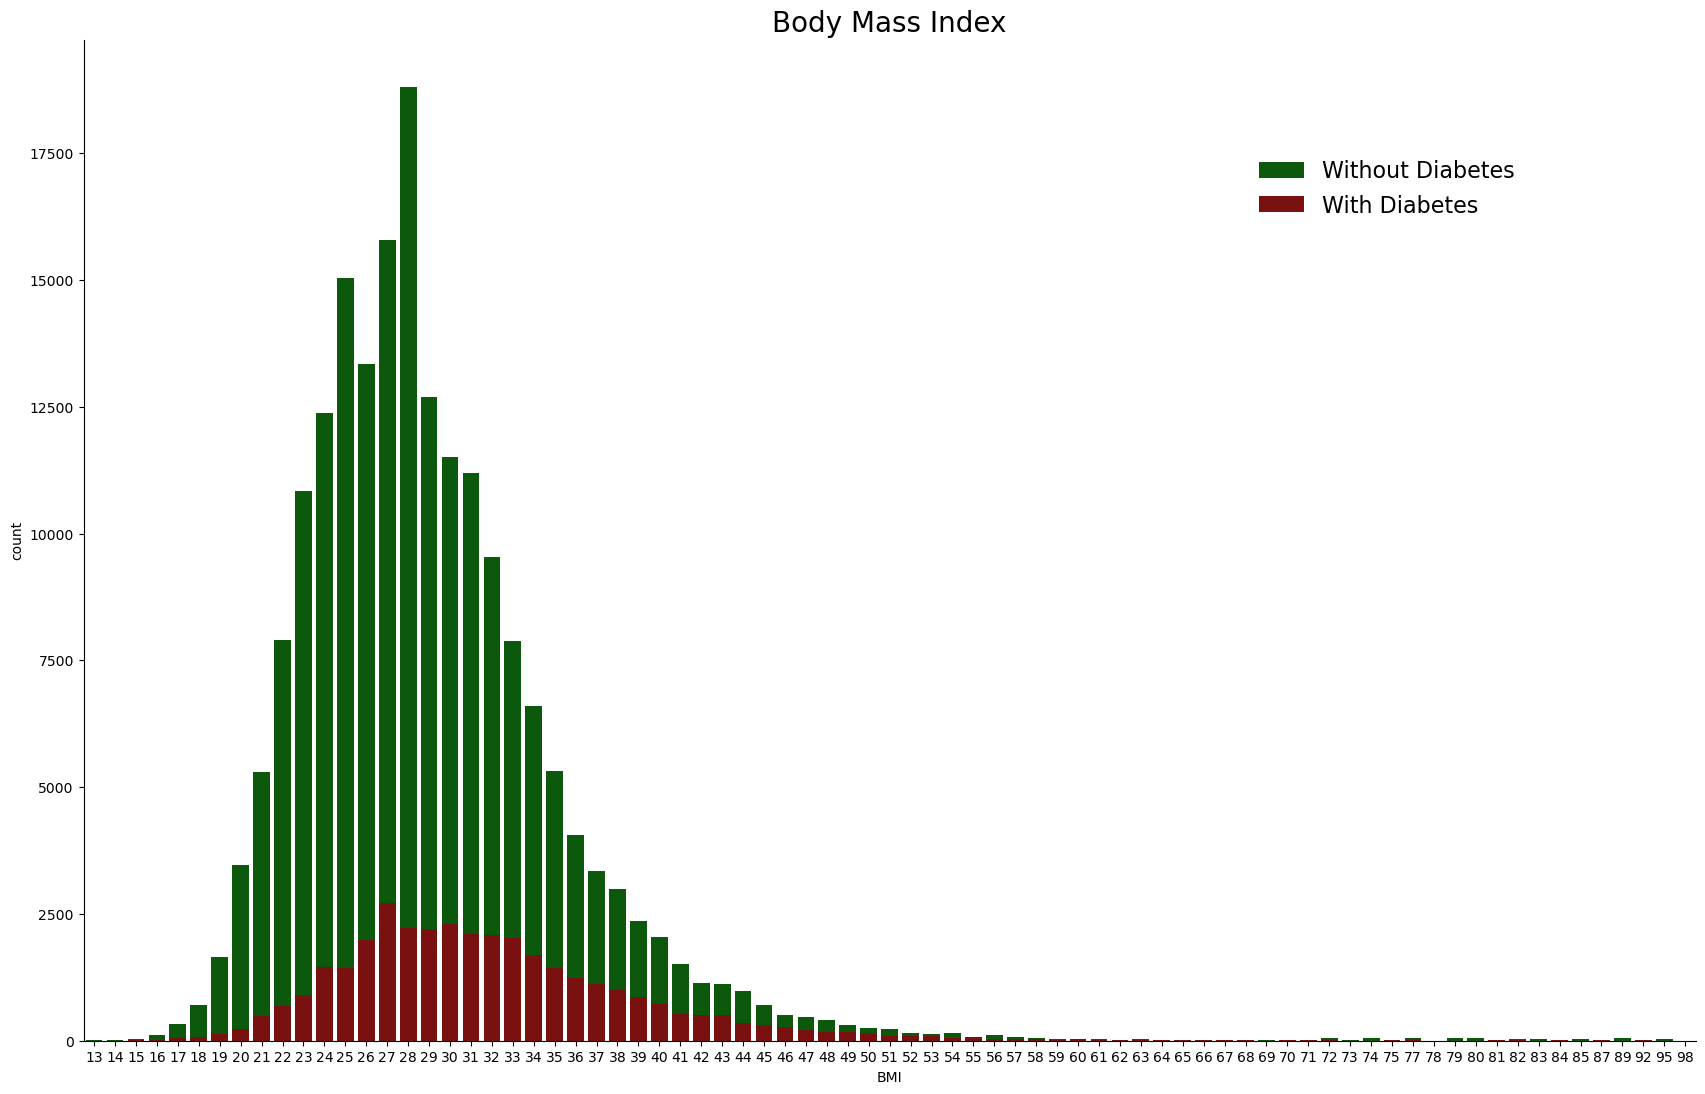

In [36]:
ratio = 13
plt.figure(figsize=(ratio*1.6,ratio))
colors = ['#8B0000','#006400']

sns.countplot(x=(D3[D3['Diabetes_binary']==False]['BMI']), color=colors[1], label="Without Diabetes")
sns.countplot(x=(D3[D3['Diabetes_binary']==True]['BMI']), color=colors[0], label="With Diabetes" )
sns.despine()
plt.title("Body Mass Index", size=20)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0),shadow=False, frameon=False, prop={'size':16});

# Interpretation of BMI
According with CDC the body mass index is evaluated using established weight status groups for people who are at least 20 years old. There is no difference between men and women of any age or body shape when it comes to these categories.
If your body mass index  is less than 18.5, then you are considered to be underweight. If your body mass index falls between 18.5 and 24.9, you are considered to have a healthy weight. If your body mass index  is in the ranges of 25.0 and 29.9, you are considered to be overweight. If your body mass index  is 30.0 or greater, you are considered to be obese. 

In [37]:
# creating a new binned column 

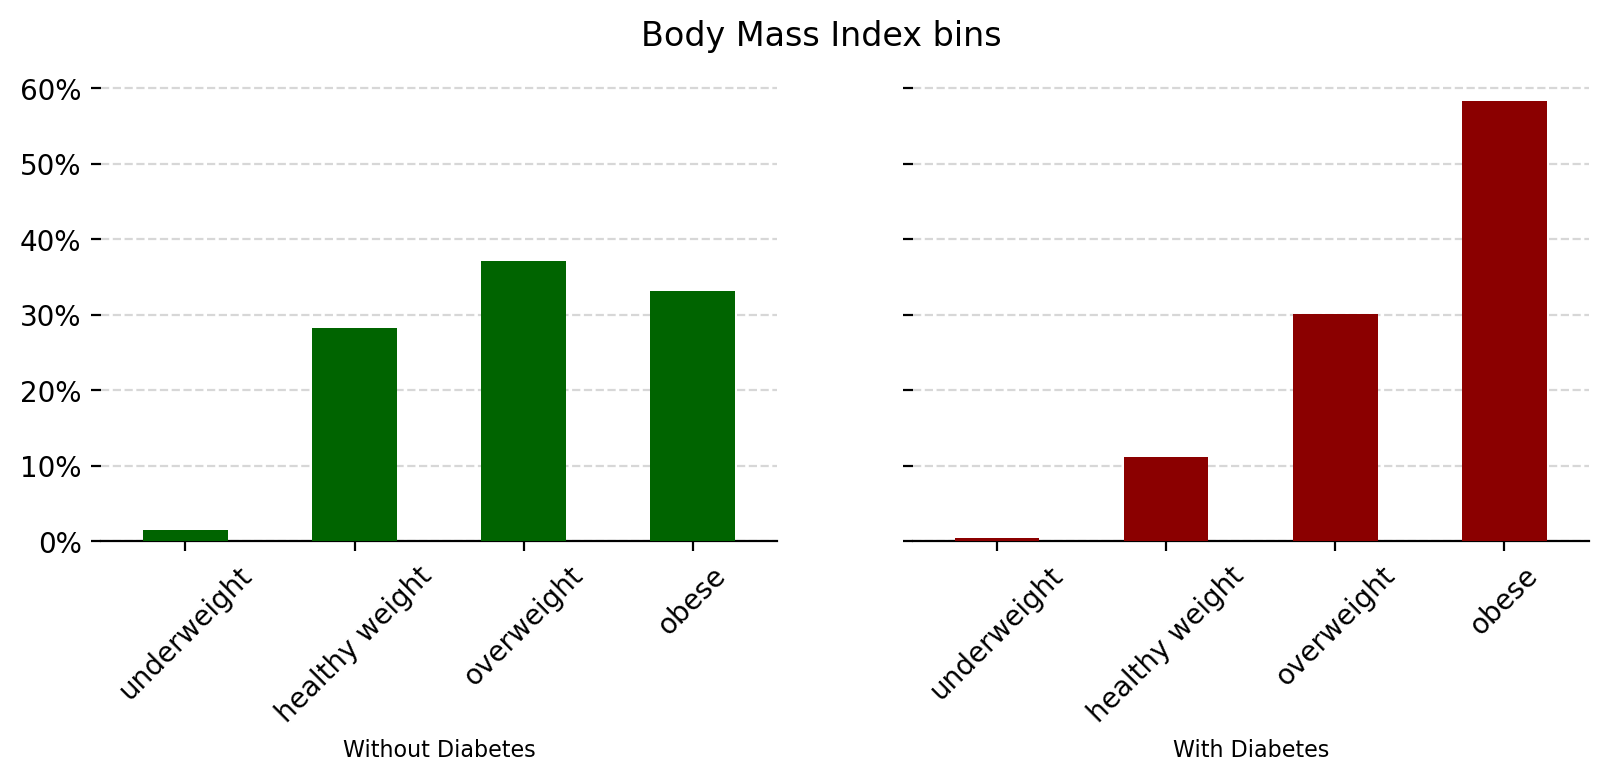

In [38]:
labels = ['underweight', 'healthy weight', 'overweight', 'obese']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Body Mass Index bins')

(D3[D3['Diabetes_binary']==False]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(D3[D3['Diabetes_binary']==True]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_xticklabels(labels)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

The analysis indicates that there is no significant correlation between BMI bins and the group without diabetes, whereas a strong positive correlation between diabetes and obesity.

# High Cholestrol (HighChol)
According to the data dictionary, this refers to the cholesterol categorization of the patient.

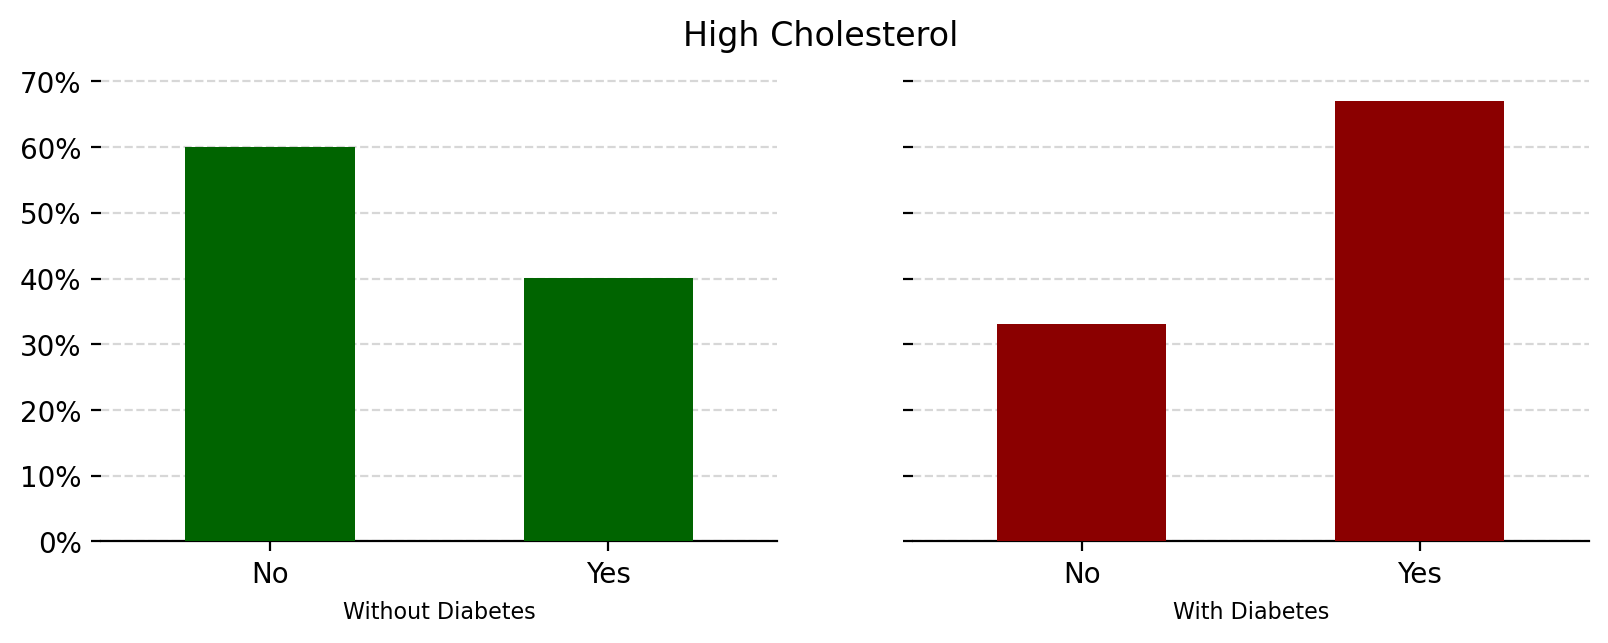

In [39]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('High Cholesterol')

(D3[D3['Diabetes_binary']==False]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(D3[D3['Diabetes_binary']==True]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

According to the findings of the study of the dataset, those who have been diagnosed with diabetes have a cholesterol level that is noticeably greater than that of people who do not have the illness.

# Patients Age(Age)

According to MetaData, this is a categorization of the patient's age with increments of five years, where:

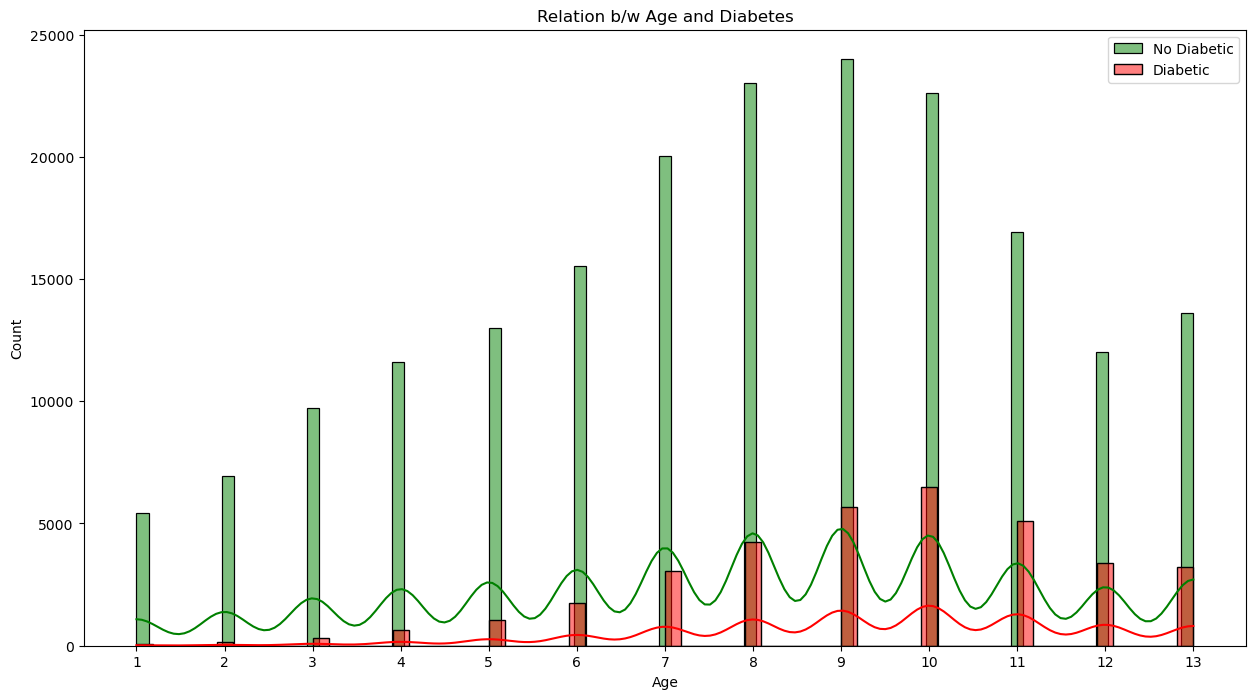

In [40]:
plt.figure(figsize=(15, 8))
sns.histplot(D3.Age[D3.Diabetes_binary == 0], color="g", label="No Diabetic" , kde = True )
sns.histplot(D3.Age[D3.Diabetes_binary == 1], color="r", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(D3["Age"].unique())
plt.legend()

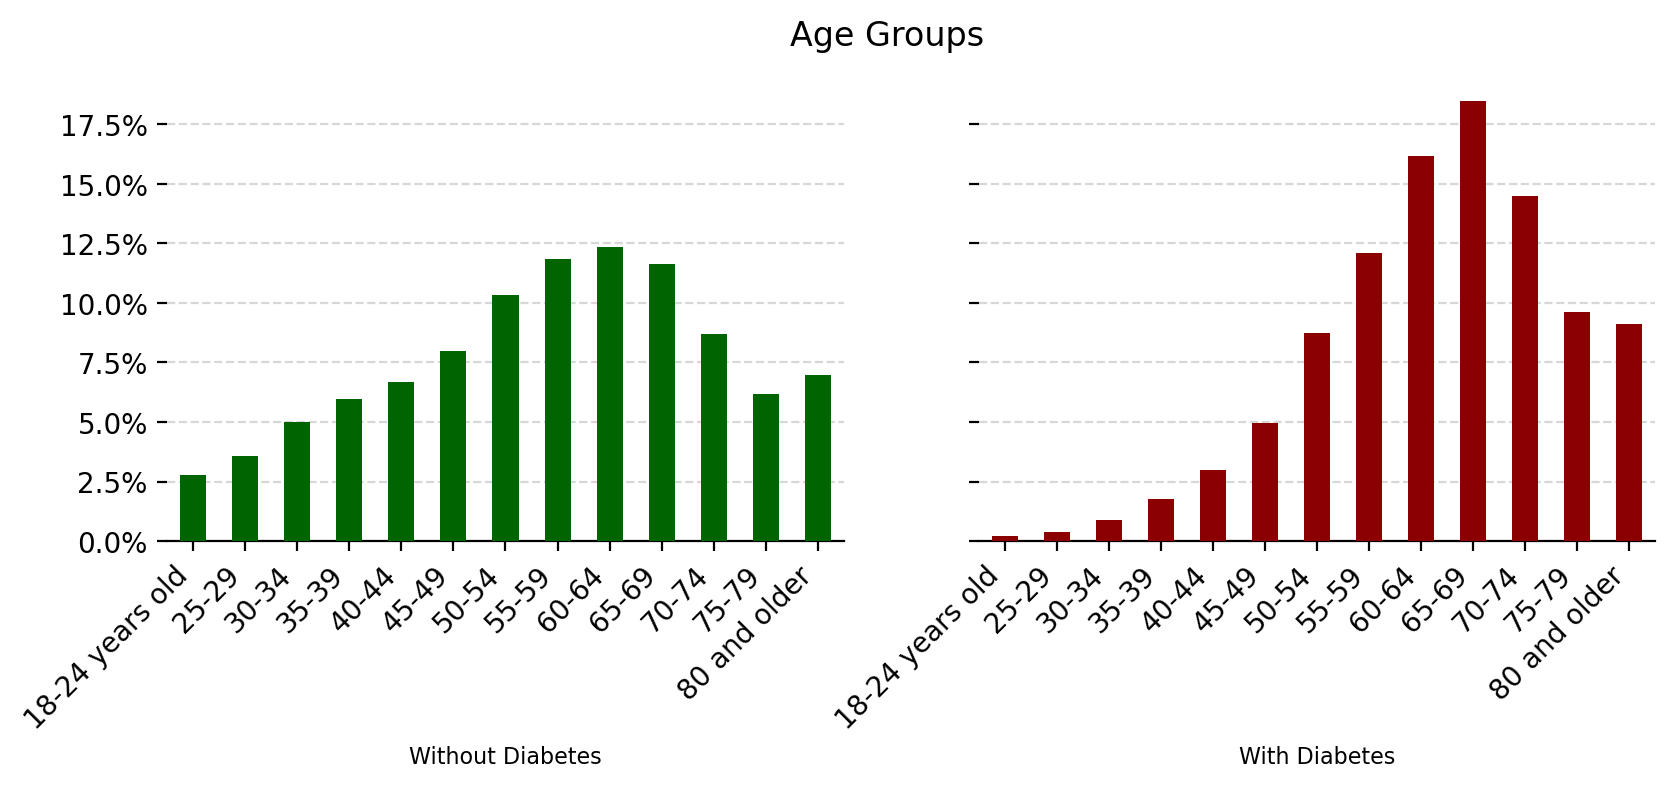

In [41]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Age Groups')
age_groups = ['18-24 years old', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54', 
              '55-59', '60-64', '65-69', '70-74', 
              '75-79', '80 and older']


(D3[D3['Diabetes_binary']==False]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(age_groups)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

(D3[D3['Diabetes_binary']==True]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(age_groups)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');

The examination of the information revealed that, in comparison to people who did not have the illness, there was a significant increase in the number of people diagnosed with diabetes between the ages of 50 and 74 years old.

# Heart Disease or Heart Attack (HeartDiseaseorAttack)

It is explained in the data dictionary that the patient condition being referred to is either the existence of coronary heart disease or myocardial infarction.

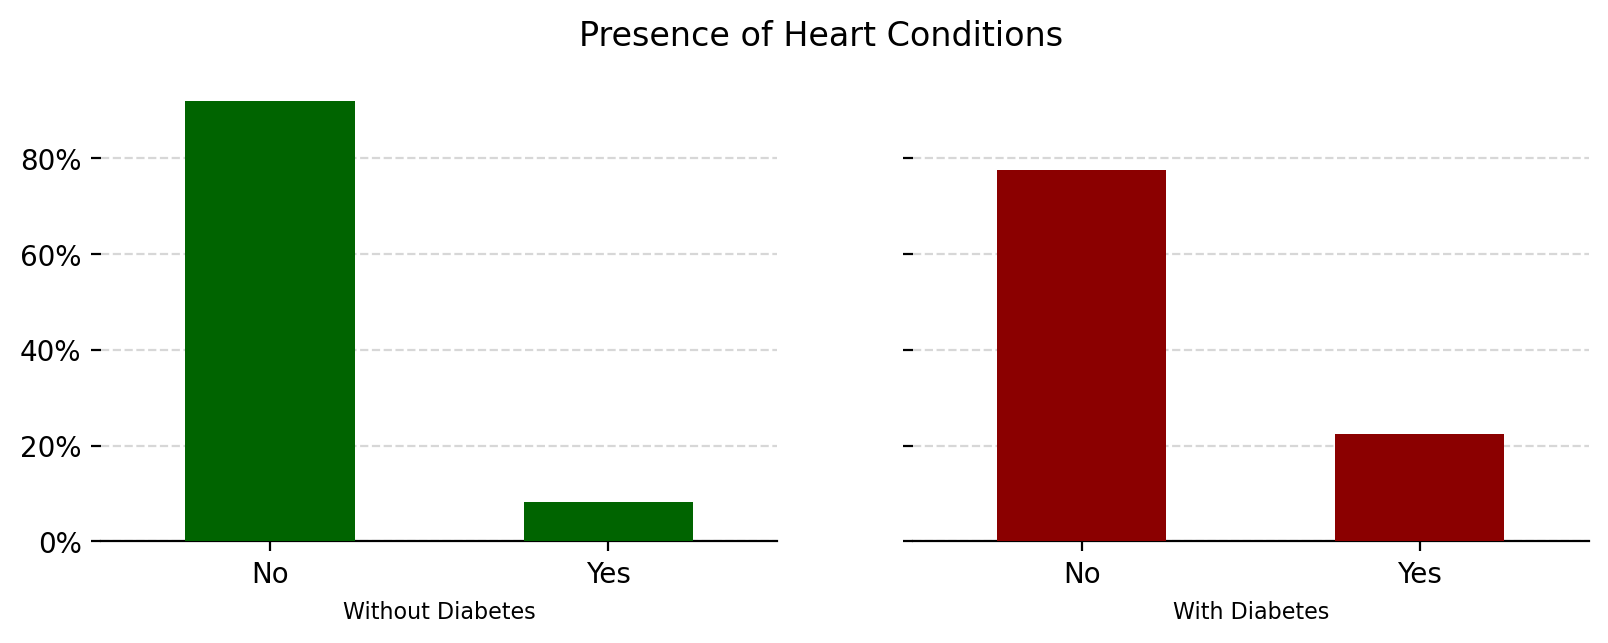

In [42]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of Heart Conditions')

(D3[D3['Diabetes_binary']==False]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(D3[D3['Diabetes_binary']==True]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

According to the findings of the analysis of the dataset, people who have been diagnosed with diabetes have a considerably higher risk of developing cardiac conditions in comparison to people who do not have the condition.

# Physical Health (PhysHlth)

The data dictionary provides an explanation of the number of days spent unwell or injured during the last 30.

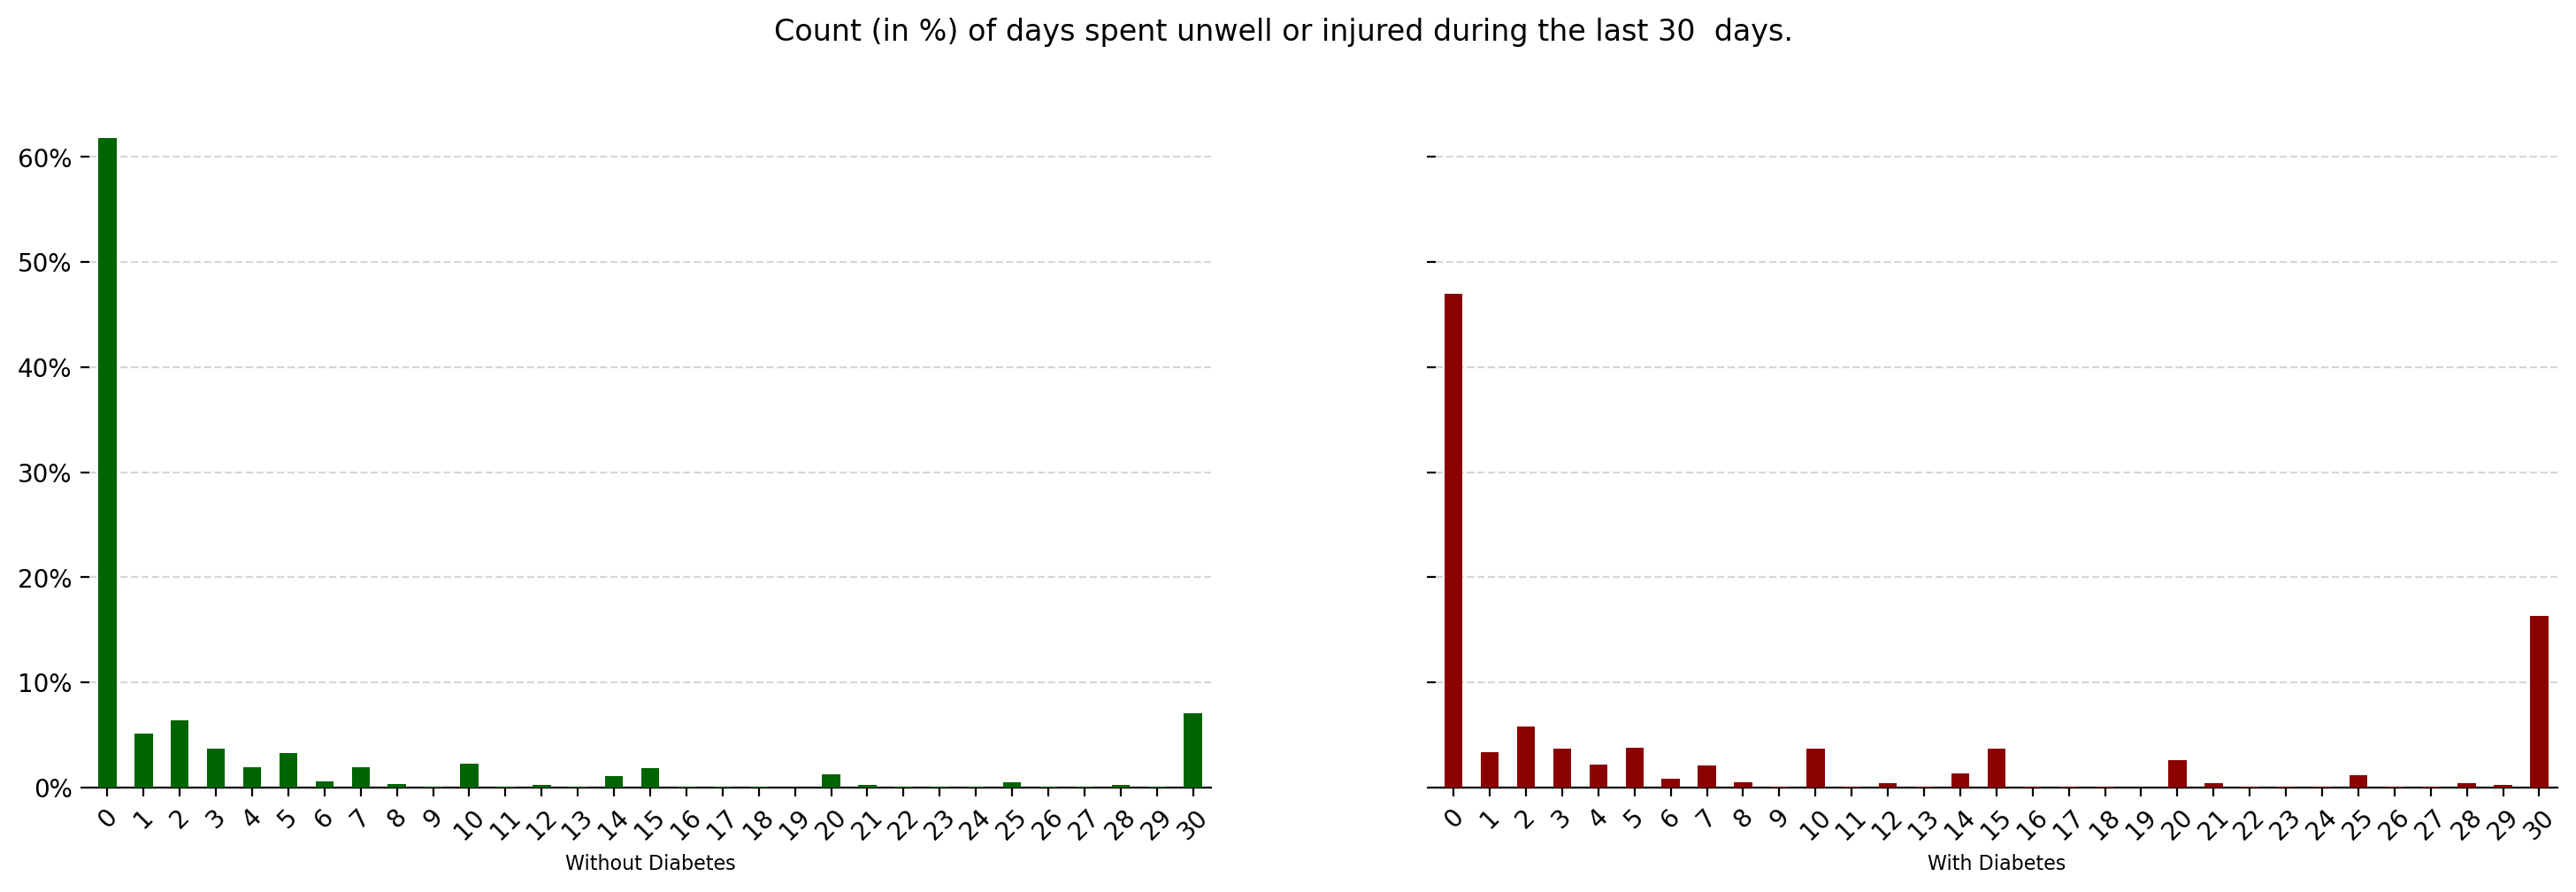

In [43]:
ratio = 5
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.6,ratio), dpi=200, sharey=True)
fig.suptitle('Count (in %) of days spent unwell or injured during the last 30  days.')

(D3[D3['Diabetes_binary']==False]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

(D3[D3['Diabetes_binary']==True]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);


According to the findings of the study of the dataset, those who have been diagnosed with diabetes have a considerably higher number of days in which they experienced at least one sort of sickness or injury, in comparison to people who do not have the disease.

# Checking outliers in General Health(GenHlth), Mental Health (MentHlth) and Physical Health (PhysHlth)

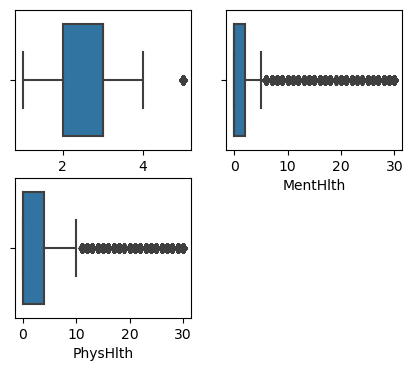

In [44]:
plt.figure(figsize = (5,4))
for i,col in enumerate(['GenHlth', 'MentHlth', 'PhysHlth']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = col, data = D3)
plt.show()

The results of the boxplot indicate that both mental and physical health contain a number of outliers.

# Annual Household Income(Income)
Data dictionary dipicts patient Annual household income in dollar, where:


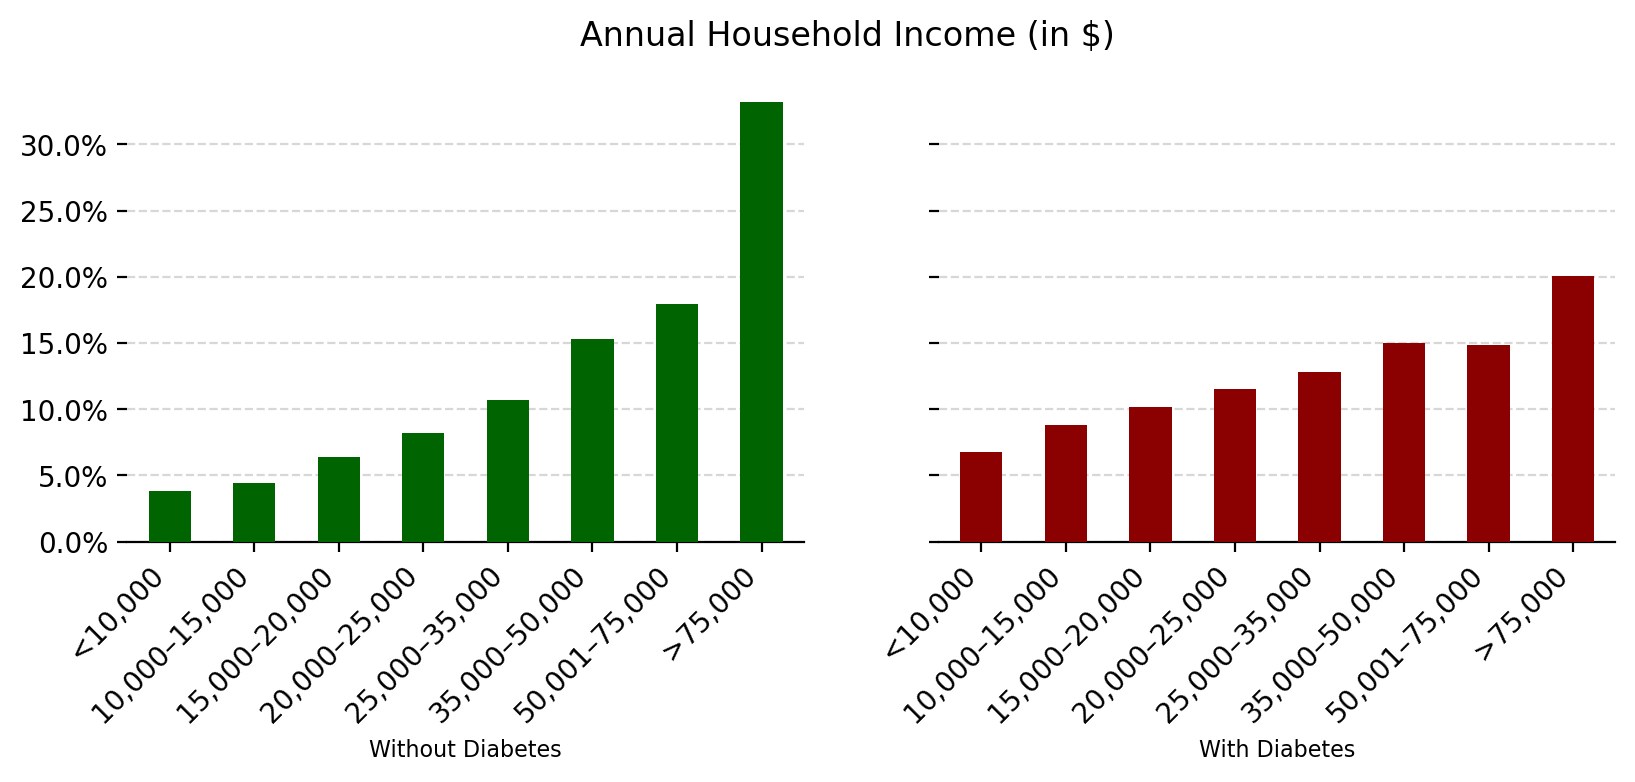

In [45]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Annual Household Income (in $)')
income_groups = ['<10,000', '10,000–15,000', '15,000–20,000', 
                 '20,000–25,000', '25,000–35,000', '35,000–50,000', 
                 '50,001–75,000', '>75,000']

(D3[D3['Diabetes_binary']==False]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(income_groups)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)


(D3[D3['Diabetes_binary']==True]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(income_groups)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)

The examination of the dataset revealed that, in comparison to people who did not have the illness, those with a diagnosis of diabetes were much more likely to be found in the lower income brackets.

# Education Level (Education)

This variable provides a response to the query regarding educational level.

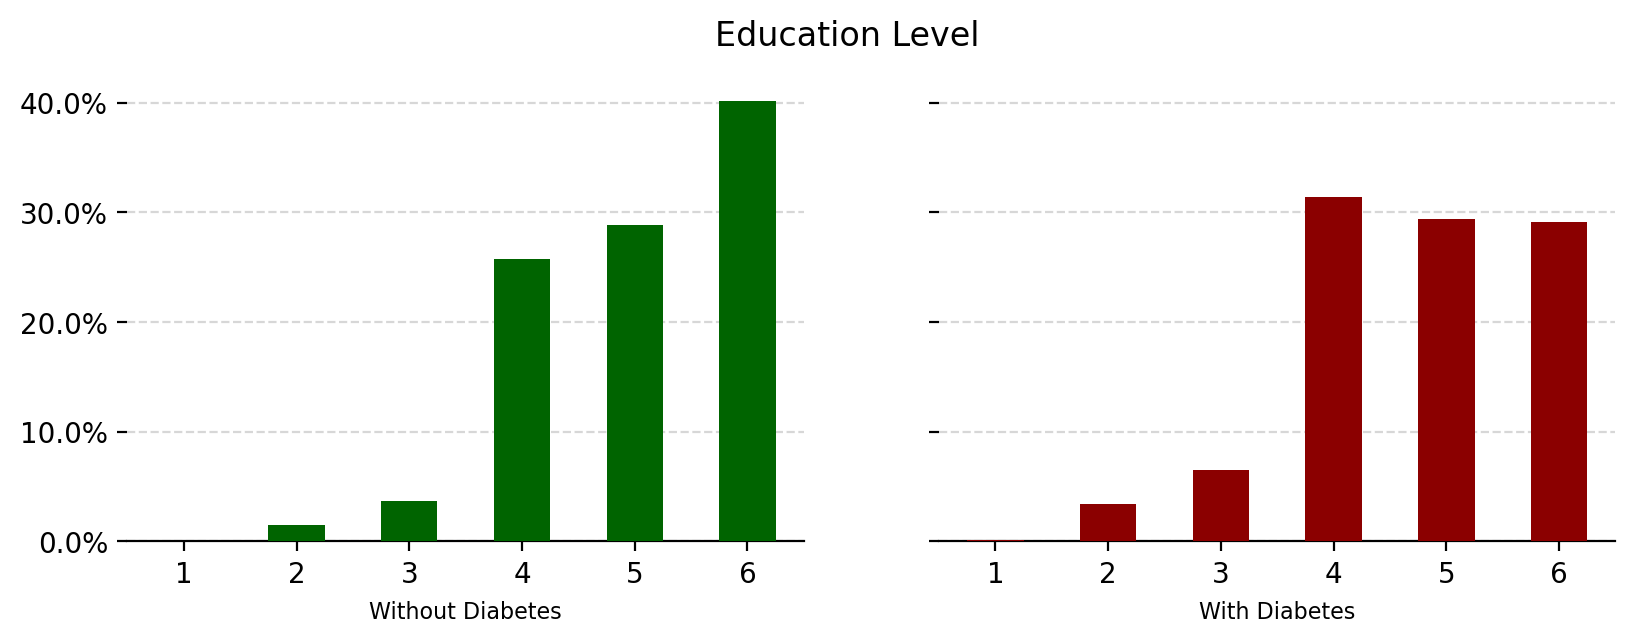

In [46]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Education Level')


(D3[D3['Diabetes_binary']==False]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)


(D3[D3['Diabetes_binary']==True]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)

In comparison to those who do not have the condition, a lower percentage of people with advanced degrees have been identified as having diabetes.

# Checking outliers for variables Patient Age(Age), Education Level(Education) and Annual Household Income(Income)

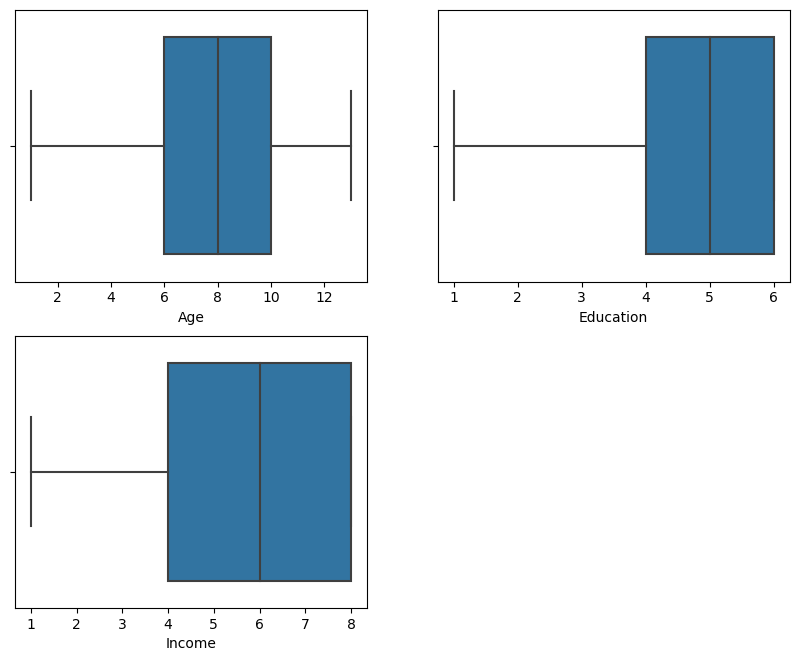

In [47]:
plt.figure(figsize = (10,12))
for i,col in enumerate(['Age','Education', 'Income']):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = col, data = D3)
plt.show()

# Physical Activity (PhysActivity)
physical activity in past 30 days (not including job).

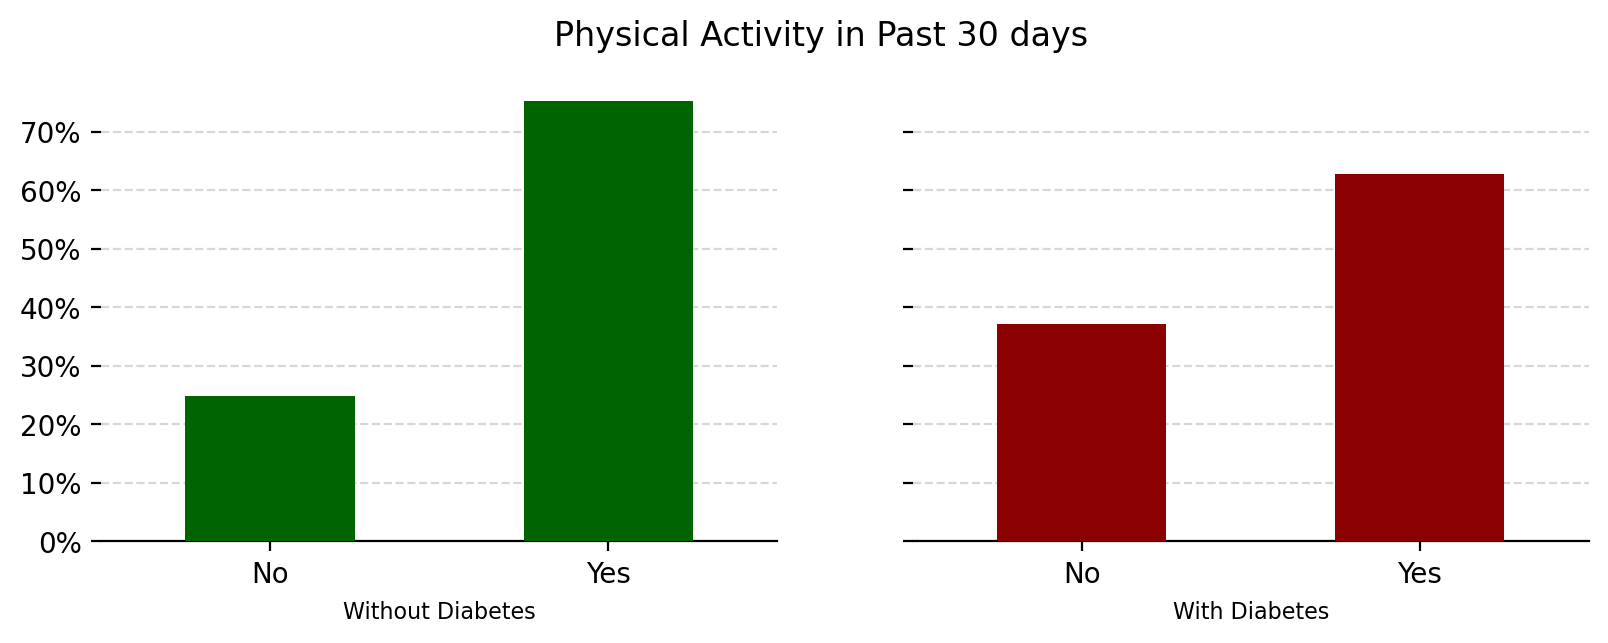

In [48]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Physical Activity in Past 30 days')

(D3[D3['Diabetes_binary']==False]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(D3[D3['Diabetes_binary']==True]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The examination of the information reveals that, in comparison to persons who do not have the illness, those who have been diagnosed with diabetes are more likely to report having lower levels of physical activity.

# Smoker 

Smoked at least 100 cigarettes throughout your entire life? [five packs equals one hundred cigarettes]

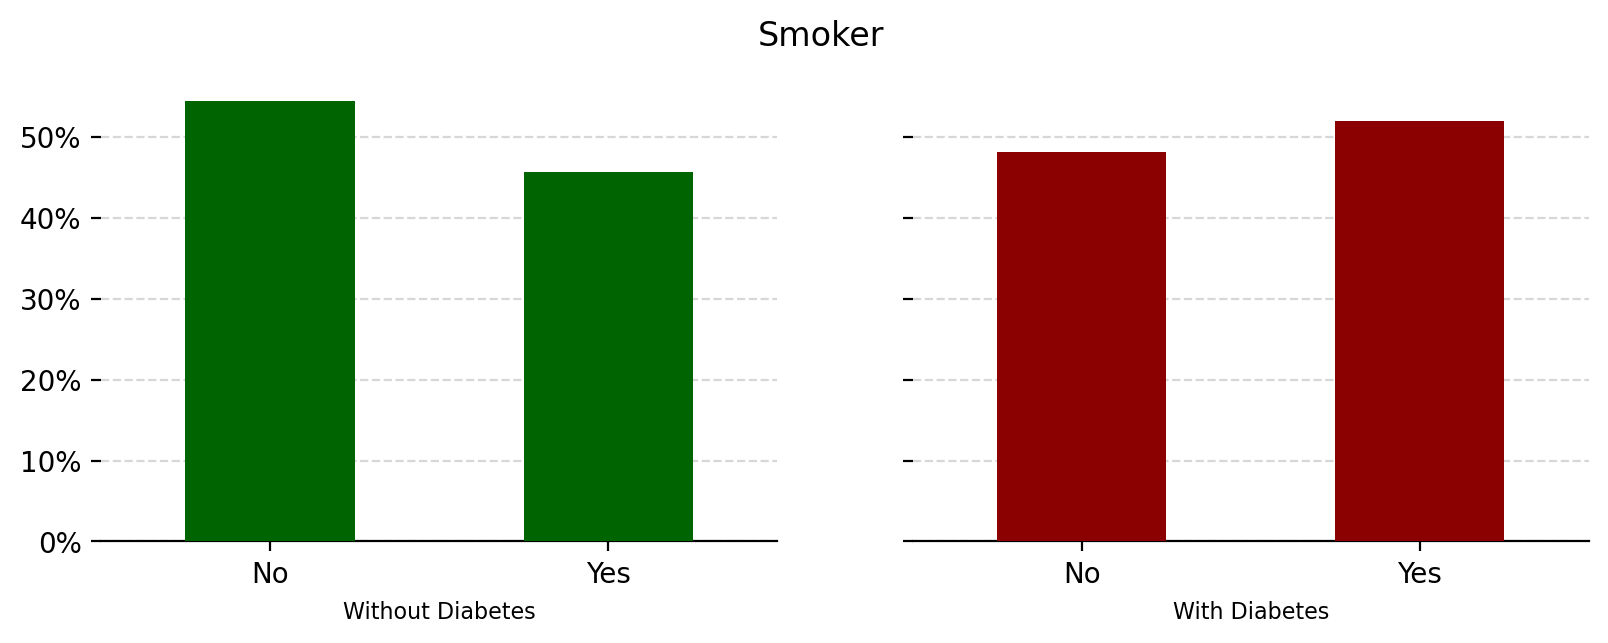

In [49]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Smoker')

(D3[D3['Diabetes_binary']==False]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(D3[D3['Diabetes_binary']==True]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color= '#8B0000' )).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

Within the diabetic population, there is a marginally greater prevalence of smokers.

# Stroke
Have you ever told that you had a stroke?

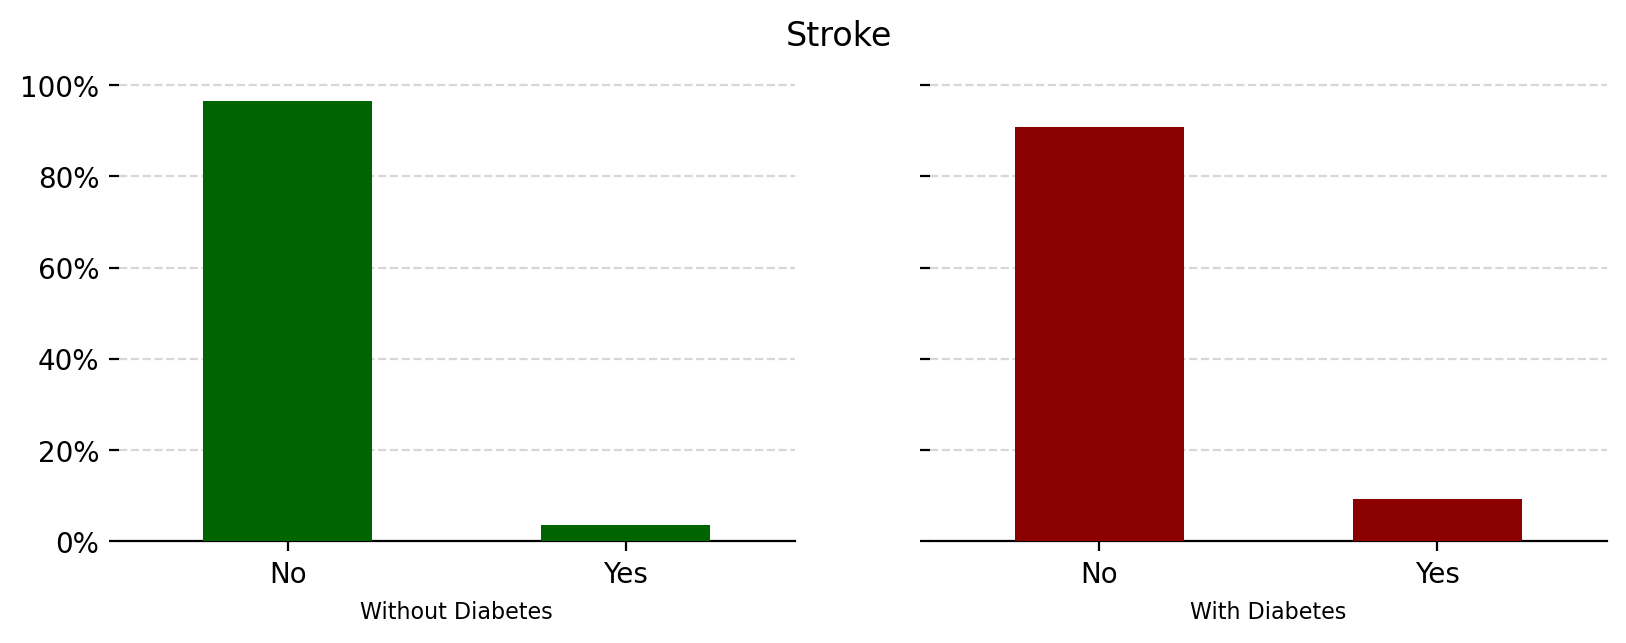

In [50]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Stroke')

(D3[D3['Diabetes_binary']==False]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(D3[D3['Diabetes_binary']==True]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

Within the diabetic group, there is slight higher quantity of strokes.

# Alcohol Consumption(HvyAlcoholConsump)

adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

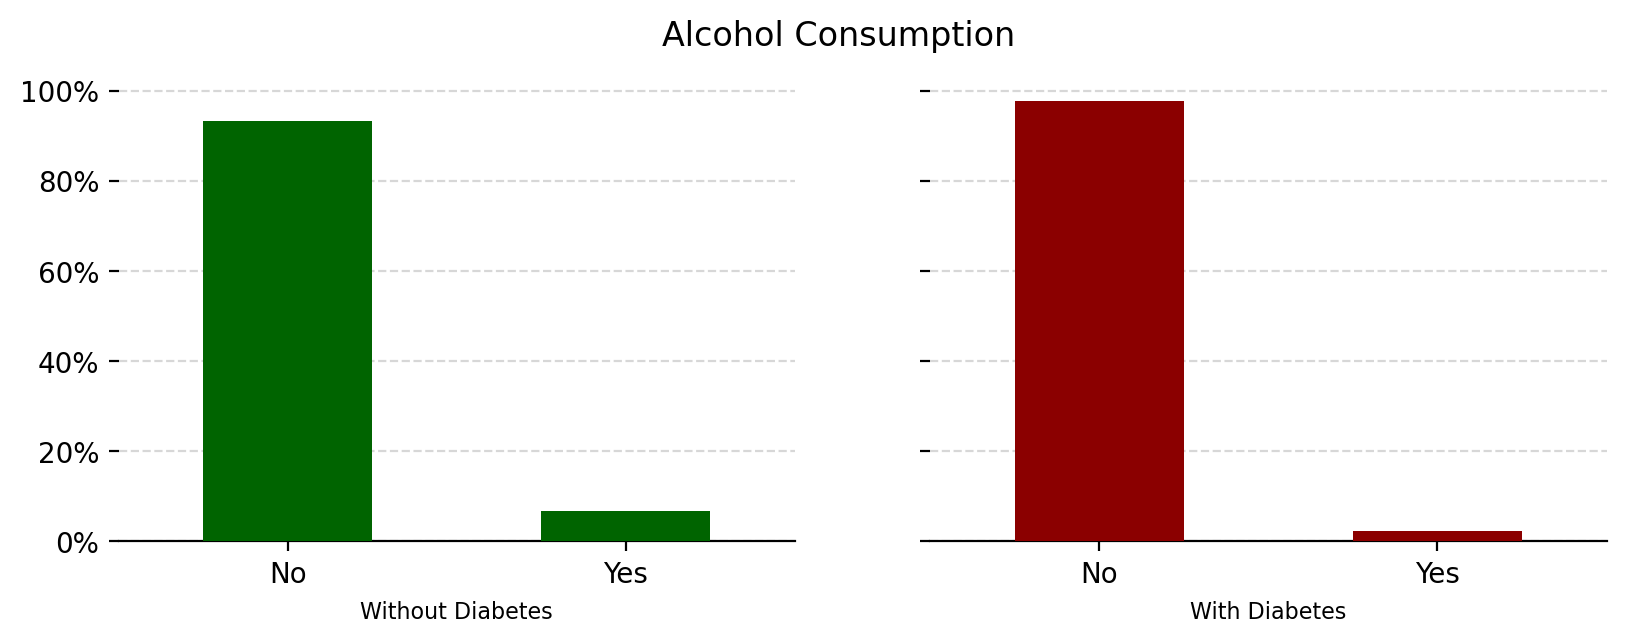

In [51]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Alcohol Consumption')

(D3[D3['Diabetes_binary']==False]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(D3[D3['Diabetes_binary']==True]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color ='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The diabetic population has a lower overall use of heavy alcohol.

# Cholesterol Check(CholCheck)

Cholesterol check within past five years

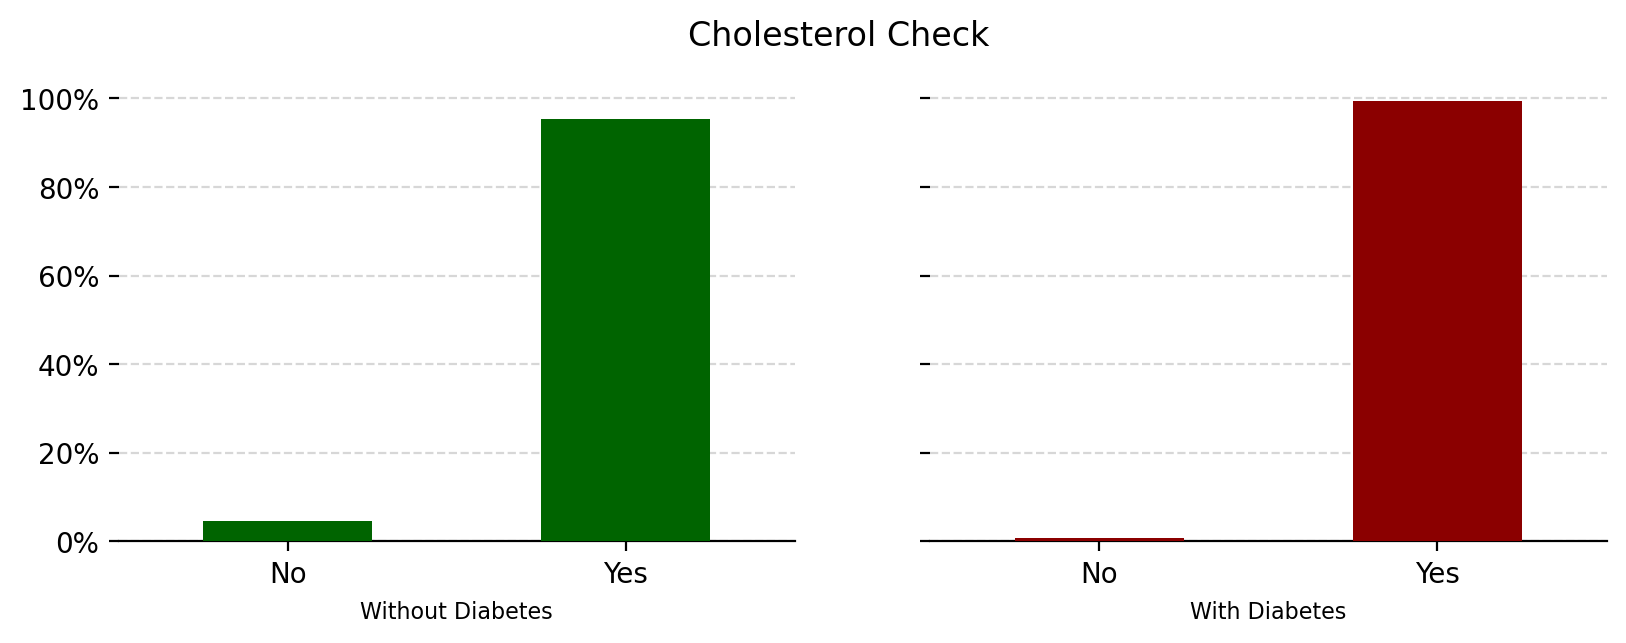

In [52]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Cholesterol Check')

(D3[D3['Diabetes_binary']==False]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color='#006400')).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(D3[D3['Diabetes_binary']==True]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color='#8B0000')).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The data show that non dibetic people dont tend to check their cholesterol in five years. 

# Feature selection 

In [53]:
# Columns sorted by Pearson correlation
Pearson_Correlation = (D3.drop('Diabetes_binary', axis=1)
   .corrwith(D3.Diabetes_binary)
   .abs()
   .sort_values(ascending=False))
Pearson_Correlation

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
BMI_bins                0.194376
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
dtype: float64

In [54]:
Pearson_Correlation[Pearson_Correlation>0.05]

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
BMI_bins                0.194376
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
dtype: float64

Pearson correlation coefficients sorted in decreasing order and absolute value.

If we set a threshold of 0.05, Smoker, Veggies, Sex, AnyHealthcare, Fruits, NoDocbcCost are out.

Also, BMI performs better than binned BMI. To avoid redundant information, BMI_bins is out.

In [55]:
# Contigency table 
pd.crosstab(D3['Diabetes_binary'],D3['HighBP'],margins=True)

HighBP,0,1,All
Diabetes_binary,,,
0,116522,77855,194377
1,8692,26405,35097
All,125214,104260,229474


In [56]:
D3_A = D3.drop('Diabetes_binary', axis=1)
D3_B = D3['Diabetes_binary']

The dataset does not include any negative numbers. Almost entirely composed of defining characteristics. Chi-squared is the most utilised in this case.

In [57]:
# Chi-square 2-sample Test

f_score = chi2(D3_A, D3_B)
C_square = pd.DataFrame(f_score).T.set_index(D3_A.columns).rename(columns={0:'Chi-square score', 1:"Chi-square pValue"})
c2_list = C_square.sort_values(by='Chi-square score', ascending=False)
c2_list

,Chi-square score,Chi-square pValue
PhysHlth,97988.761672,0.000000e+00
BMI,15507.736174,0.000000e+00
MentHlth,11419.584750,0.000000e+00
Age,8539.906340,0.000000e+00
HighBP,8098.548237,0.000000e+00
DiffWalk,7875.496177,0.000000e+00
GenHlth,7671.732832,0.000000e+00
HeartDiseaseorAttack,5822.145697,0.000000e+00
HighChol,4869.312739,0.000000e+00
Income,3377.099257,0.000000e+00


# ANOVA test

In [58]:
# ANOVA
Anova_t = f_classif(D3_A[num_vars],D3_B)
Anova_dataframe = pd.DataFrame(Anova_t).T.set_index(D3_A[num_vars].columns).rename(columns={0:'f_statistic', 1:"ANOVA_pValues"})
Anova_dataframe.sort_values(by='f_statistic', ascending=False)

,f_statistic,ANOVA_pValues
GenHlth,19061.433726,0.000000e+00
BMI,10163.821697,0.000000e+00
BMI_bins,9010.095612,0.000000e+00
Age,7444.479505,0.000000e+00
PhysHlth,5739.701978,0.000000e+00
Income,4631.703286,0.000000e+00
Education,2445.635014,0.000000e+00
MentHlth,674.909059,1.405305e-148


The findings of the ANOVA statistics indicate that the probability distributions of the variances are not comparable between the diabetes and non-diabetic groups for these characteristics.

# Information Value (IV) & Weight of evidence (WOE)

In [59]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Dataframe is null
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Column name extract 
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [60]:
iv,woe = iv_woe(D3, 'Diabetes_binary')

Information value of HighBP is 0.532771
Information value of HighChol is 0.298296
Information value of CholCheck is 0.077694
Information value of BMI is 0.405771
Information value of Smoker is 0.015939
Information value of Stroke is 0.057511
Information value of HeartDiseaseorAttack is 0.16753
Information value of PhysActivity is 0.071942
Information value of Fruits is 0.004702
Information value of Veggies is 0.012756
Information value of HvyAlcoholConsump is 0.047814
Information value of AnyHealthcare is 0.005533
Information value of NoDocbcCost is 0.00295
Information value of GenHlth is 0.648408
Information value of MentHlth is 0.036244
Information value of PhysHlth is 0.171821
Information value of DiffWalk is 0.267031
Information value of Sex is 0.008216
Information value of Age is 0.395241
Information value of Education is 0.079076
Information value of Income is 0.151785
Information value of BMI_bins is 0.327313


In [61]:
iv.sort_values(by='IV', ascending=False)

,Variable,IV
0,GenHlth,0.648408
0,HighBP,0.532771
0,BMI,0.405771
0,Age,0.395241
0,BMI_bins,0.327313
0,HighChol,0.298296
0,DiffWalk,0.267031
0,PhysHlth,0.171821
0,HeartDiseaseorAttack,0.167530
0,Income,0.151785


The majority of the features' evaluations show a link between the IV score and the Pearson correlation.

In [62]:
# threshold of 250 chi-square.

C_square[C_square['Chi-square score']>250].index.to_list()

['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income',
 'BMI_bins']

According to the chi2 statistic, these are the top 16 characteristics. Both BMI and BMI bins contain unnecessary data. Although the Information Gain obtained from BMI bins is greater than that obtained from BMI, the Pearson correlation, Chi-square  score, and f statistic obtained from BMI are superior to those obtained from BMI bins. The ensuing models will be tested using two column groups, with BMI being used in one group and BMI bins being used in the other.

This feature selection was carried out in a completely random manner in order to initiate the model baseline. Information shows improvements indirectly, a chi2 score threshold of 250 was observed to coincide with pearson correlation.


# Exploratory Data Analysis on Target Variable


In [63]:
# Checking the shape of the dataset 
D3.shape

(229474, 23)

In [64]:
a = D3.drop(['Diabetes_binary'], axis=1)
b = D3['Diabetes_binary']

In [65]:
# Class distribution 

b.value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

<AxesSubplot:ylabel='Diabetes_binary'>

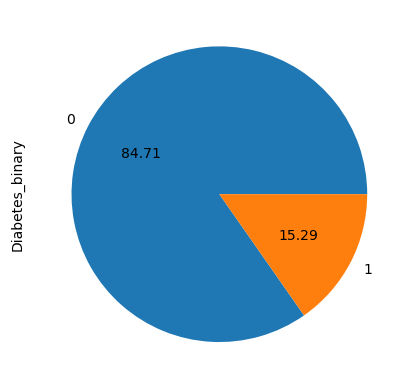

In [66]:
# Showing pie plot

b.value_counts().plot.pie(autopct='%.2f')

Diabetes_binary is our target variable. Here 0 means non diabetic people and 1 means diabetic people. It can be clearly observed that the data set is not balanced and any analysis in such conditions can result in the formation of a biased model.
In order to built an accurat model we are going to balance the dataset.  86.07 percent people are not diabetic where as only 13.93 percent people are diabetic. 

# Random undersampling 

This will resample all the classes accept diabetic people which are represented as 1

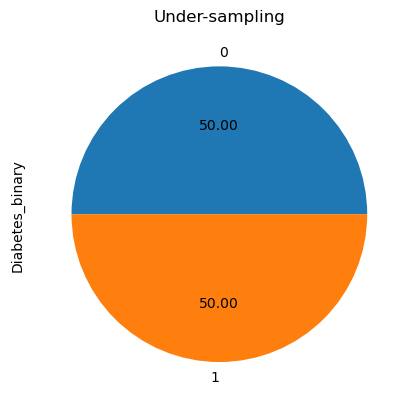

In [67]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=1) # Numerical value
# RUS = RandomUnderSampler(sampling_strategy="not minority") # String
a_res, b_res = RUS.fit_resample(a, b)

ax = b_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [68]:
# Class distribution
b_res.value_counts()

0    35097
1    35097
Name: Diabetes_binary, dtype: int64

# Random oversampling 

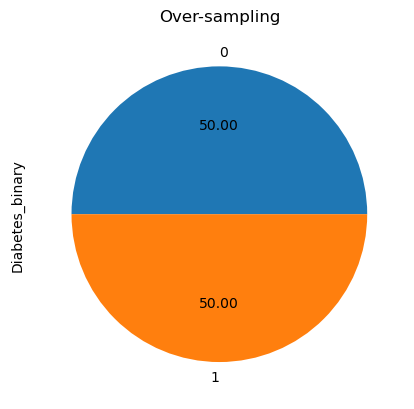

In [69]:
from imblearn.over_sampling import RandomOverSampler

#ROS = RandomOverSampler(sampling_strategy=1) # Float
ROS = RandomOverSampler(sampling_strategy="not majority") # String
a_res, b_res = ROS.fit_resample(a, b)

ax = b_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [70]:
# Class distribution

b_res.value_counts()

0    194377
1    194377
Name: Diabetes_binary, dtype: int64

# Preparation of the model for predicting patients diabetes 

The model will be trained using a subset of this dataset (referred to as X_train), then tested using a portion of the same dataset that it did not see during its training (referred to as X_test), and finally, the model's performance will be evaluated using an unseen dataset that has been carefully balanced (referred to as unseen_data).

In [71]:
# Processing data
def drop_duplicates_and_reset_index(D3):
    df = D3.copy()
    df = df.drop_duplicates().reset_index(drop=True)
    return df

# list of columns used 
cols_list = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']

X = D3[cols_list]
y = D3['Diabetes_binary']

# on unseen dataset
unseen_data_clean = data_clean(unseen_data) 
unseen_data_y = unseen_data_clean['Diabetes_binary']
unseen_data_X =unseen_data_clean[cols_list]

#scaler
scaler = StandardScaler()
scaler.fit(X)

# on unseen dataset
unseen_data_X_scaled = scaler.transform(unseen_data_X)

In [72]:
# unseen balanced dataset
noD_acc = accuracy_score(unseen_data_y, np.zeros_like(unseen_data_y))
noD_uac = roc_auc_score(unseen_data_y, np.zeros_like(unseen_data_y))

print(f'The accuracy for all 0 is {noD_acc:0.4f} and AUC is {noD_uac:0.4f} in the unseen balanced dataset')

The accuracy for all 0 is 0.4918 and AUC is 0.5000 in the unseen balanced dataset


The information is balanced, so if you predict non-diabetic, you have the same chance of being correct as if you guessed diabetic.

# Model preparation without balancing dataset 

In [73]:
# list of models
clf_rdf = RandomForestClassifier(random_state=689151)
clf_catboost = CatBoostClassifier(random_state=689151, verbose=False)
clf_xgb = XGBClassifier(random_state=689151)
clf_gauss_nb = GaussianNB()
clf_lr = LogisticRegression(max_iter=500, random_state=689151)
clf_gb = GradientBoostingClassifier(random_state=689151)


In [74]:
def classifiers_models_test(clf_names, clf_list):
    '''For a given list of classfier name_list and object_list,
     return model, ACC, AUC and RMSE Dataframe'''
    
    info_clf = []
    for count, clf in enumerate(clf_list):
        print('starting')
        clf.fit(X_train, y_train)

        # predict X_train
        y_pred = clf.predict(X_train)
        y_pred_proba = clf.predict_proba(X_train)[:,1]
        acc_score_xtr = accuracy_score(y_train, y_pred)
        auc_score_xtr = roc_auc_score(y_train,y_pred_proba)
        rmse_xtr = np.sqrt(mean_squared_error(y_train, y_pred))

        # predict X_test
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:,1]
        acc_score_xts = accuracy_score(y_test, y_pred)
        auc_score_xts = roc_auc_score(y_test,y_pred_proba)
        rmse_xts = np.sqrt(mean_squared_error(y_test, y_pred))

        # predict balanced unseen dataset unseen_data
        y_pred = clf.predict(unseen_data_X_scaled)
        y_pred_proba = clf.predict_proba(unseen_data_X_scaled)[:,1]
        acc_score_un = accuracy_score(unseen_data_y, y_pred)
        auc_score_un = roc_auc_score(unseen_data_y,y_pred_proba)

        # RMSE score of the results in unseen dataset unseen_data
        rmse_un = np.sqrt(mean_squared_error(unseen_data_y, y_pred))
        print('Appending')
        info_clf.append([clf_N[count],acc_score_xtr,auc_score_xtr,rmse_xtr,acc_score_xts,auc_score_xts,rmse_xts,acc_score_un,auc_score_un,rmse_un])
        info_df = pd.DataFrame(info_clf, columns=['Model', 
                                'train_Accuracy','train_AUC', 'train_RMSE', 
                                'test_Accuracy','test_AUC', 'test_RMSE',
                                'unseen_Accuracy','unseen_AUC', 'unseen_RMSE'])
    return info_df

1     35097
0    194377
Name: Diabetes_binary, dtype: int64



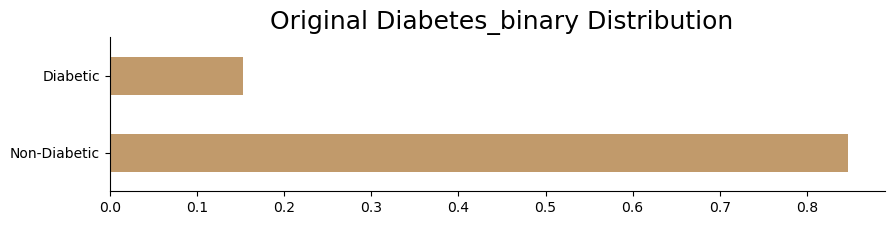


1     31572
0    174954
Name: Diabetes_binary, dtype: int64



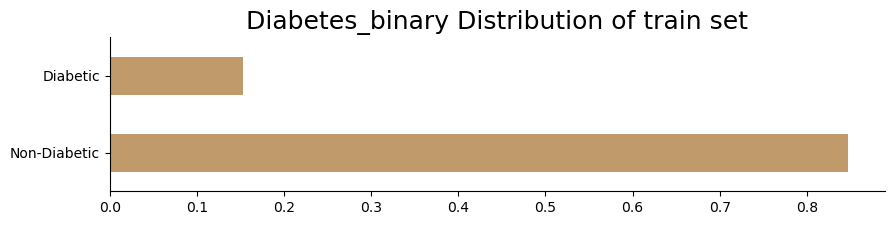

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.1, # dataset to allocate to test set
    random_state=689151, # setting the seed here
)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


print(y.value_counts(ascending=True))
print()
y.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes_binary Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution of train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()

clf_N = ['RandomForest', 'CatBoost', 'XgBoost', 'GaussianNB', 'LogisticRegression', 'GradientBoosting']
clf_L = [clf_rdf, clf_catboost, clf_xgb, clf_gauss_nb, clf_lr, clf_gb]



In [76]:
imbalanced_P = classifiers_models_test(clf_N,clf_L)
print('Imbalanced dataset')
imbalanced_P

starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
Imbalanced dataset


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.983227,0.997934,0.129509,0.841250,0.766565,0.398435,0.912522,0.983901,0.295768
1,CatBoost,0.864719,0.837803,0.367805,0.851534,0.812353,0.385313,0.586168,0.843859,0.643298
2,XgBoost,0.861577,0.836151,0.372053,0.850706,0.811126,0.386386,0.580274,0.842823,0.647862
3,GaussianNB,0.775476,0.767768,0.473839,0.774882,0.771560,0.474466,0.667420,0.781996,0.576698
4,LogisticRegression,0.850019,0.803975,0.387274,0.850052,0.805078,0.387231,0.555628,0.816086,0.666612
5,GradientBoosting,0.853897,0.814631,0.382234,0.853146,0.813988,0.383215,0.563795,0.824802,0.660458


RandomForest is the best performer with 0.912522 Accuracy on the unseen dataset. Few models are overfitting.

# Testing Under and Over sampling techniques

The unseen data is a 50-50 split it is balanced. 

Balancing the data and the training it will result is the creation of unbiased model. Before beginning the model fitting process, the transformation of the train set into a balanced dataset is being performed. 

# Balancing with NearMiss

1     35097
0    194377
Name: Diabetes_binary, dtype: int64



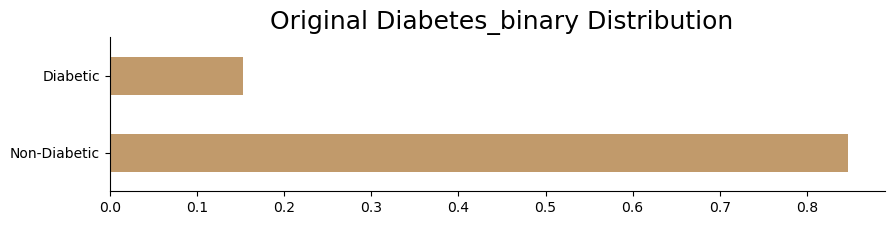


0    31572
1    31572
Name: Diabetes_binary, dtype: int64



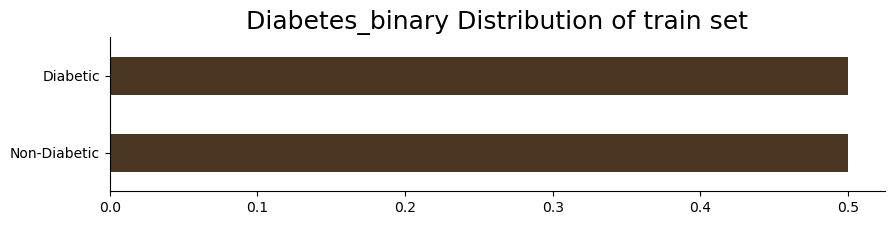

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.1, # dataset to allocate to test set
    random_state=689151, # setting the seed here
)

nm = NearMiss(version = 1, n_neighbors = 10)
X_train, y_train = nm.fit_resample(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(y.value_counts(ascending=True))
print()
y.value_counts(1).plot(kind='barh',figsize=(10, 2), color='#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes_binary Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

print(y_train.value_counts())
print()
y_train.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#4B3621').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution of train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()


In [78]:
NearMiss_P = classifiers_models_test(clf_N,clf_L)
print('NearMiss')
NearMiss_P

starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
NearMiss


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.950067,0.992566,0.223458,0.375458,0.609672,0.790280,0.634809,0.691799,0.604310
1,CatBoost,0.884375,0.939832,0.340036,0.350096,0.561521,0.806166,0.563694,0.584976,0.660535
2,XgBoost,0.880527,0.936088,0.345649,0.360336,0.573983,0.799790,0.568009,0.595542,0.657260
3,GaussianNB,0.819761,0.907106,0.424545,0.532595,0.621513,0.683670,0.607860,0.640365,0.626211
4,LogisticRegression,0.846826,0.910517,0.391374,0.487450,0.649075,0.715926,0.625338,0.666825,0.612096
5,GradientBoosting,0.863613,0.924630,0.369306,0.417030,0.629978,0.763525,0.596203,0.648126,0.635450


It is clear that NearMiss is not improving the models accuracy.

# Balancing the class with RandomUnderSampler

0    194377
1     35097
Name: Diabetes_binary, dtype: int64



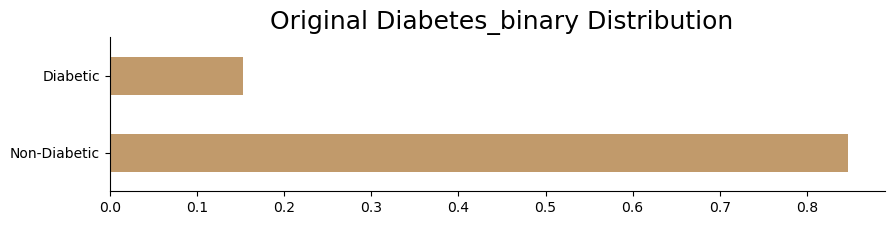


0    31572
1    31572
Name: Diabetes_binary, dtype: int64



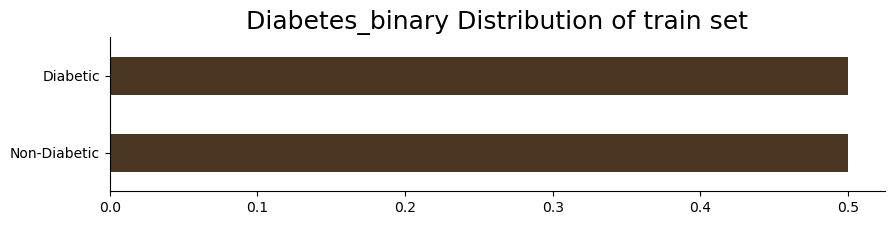

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.1, # dataset to allocate to test set
    random_state=689151, # setting the seed 
)

rus = RandomUnderSampler(sampling_strategy=1, random_state=689151)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(y.value_counts())
print()
y.value_counts(1).plot(kind='barh',figsize=(10, 2),color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes_binary Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#4B3621').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution of train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()


In [80]:
RandomSampler_P = classifiers_models_test(clf_N,clf_L)
print('RandomUnderSampler')
RandomSampler_P

starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
RandomUnderSampler


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.984480,0.999172,0.124580,0.689690,0.782224,0.557055,0.850544,0.942681,0.386596
1,CatBoost,0.761292,0.845931,0.488578,0.707818,0.811295,0.540539,0.759257,0.836889,0.490656
2,XgBoost,0.767531,0.853492,0.482150,0.706728,0.807619,0.541546,0.760763,0.838572,0.489119
3,GaussianNB,0.693288,0.767669,0.553816,0.734225,0.771751,0.515534,0.702116,0.782172,0.545788
4,LogisticRegression,0.730220,0.804707,0.519404,0.719104,0.805487,0.529996,0.740504,0.816536,0.509407
5,GradientBoosting,0.738597,0.815819,0.511275,0.712698,0.813707,0.536005,0.748136,0.824834,0.501861


Certain models perform better with RandomUnderSampler in unseen dataset, however RandomForest demonstrates a decline in its overall performance. 

# Over-Sampling using SMOTE (Synthetic Minority Over-sampling Technique)

1     35097
0    194377
Name: Diabetes_binary, dtype: int64



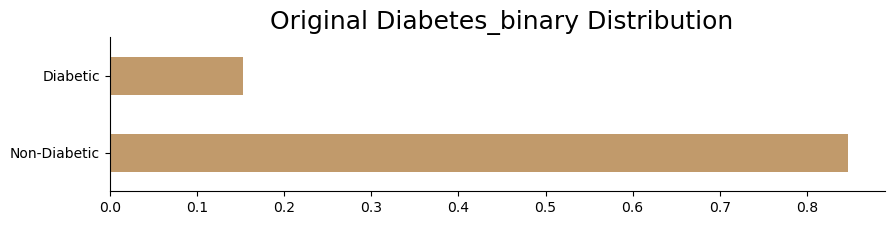


1    174954
0    174954
Name: Diabetes_binary, dtype: int64



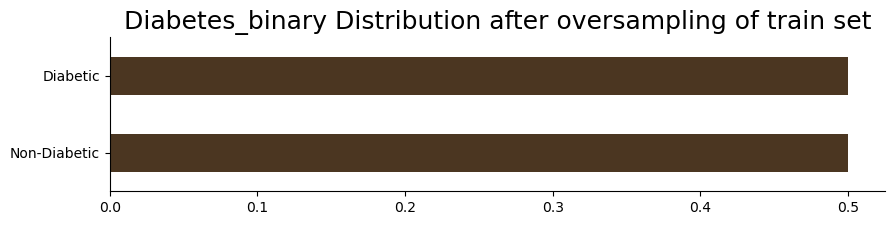

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.1, # dataset to allocate to test set
    random_state=689151, # setting the seed
)

#oversampling
oversample = SMOTE(sampling_strategy=1, random_state=689151)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(y.value_counts(ascending=True))
print()
y.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes_binary Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#4B3621').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution after oversampling of train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

clf_N2 = ['RandomForest', 'CatBoost', 'XgBoost', 'GaussianNB', 'LogisticRegression', 'GradientBoosting']
clf_L2 = [clf_rdf, clf_catboost, clf_xgb, clf_gauss_nb, clf_lr, clf_gb]
print()


In [82]:
smote_P = classifiers_models_test(clf_N2,clf_L2)
print('SMOTE')
smote_P

starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
SMOTE


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.985025,0.998749,0.122374,0.825431,0.757613,0.417814,0.930174,0.979810,0.264247
1,CatBoost,0.870978,0.948251,0.359197,0.837066,0.795579,0.403650,0.640326,0.829327,0.599728
2,XgBoost,0.863341,0.940718,0.369674,0.837633,0.800740,0.402948,0.624368,0.813637,0.612888
3,GaussianNB,0.833945,0.871205,0.407499,0.846435,0.658755,0.391873,0.491912,0.675062,0.712803
4,LogisticRegression,0.841293,0.920527,0.398381,0.831445,0.789912,0.410554,0.618518,0.800999,0.617642
5,GradientBoosting,0.856042,0.934837,0.379418,0.838766,0.804026,0.401540,0.634172,0.813079,0.604837


The results of using the Smote oversampling algorithm show that the performance of the RandomForest model improved from 0.912522 to 0.930174 in terms of unseen_Accuracy.

# Over-sampling using SMOTE and RandomUnderSampler

1     35097
0    194377
Name: Diabetes_binary, dtype: int64



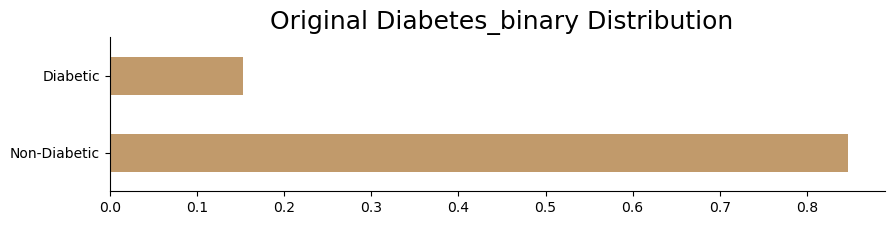


1     69981
0    174954
Name: Diabetes_binary, dtype: int64



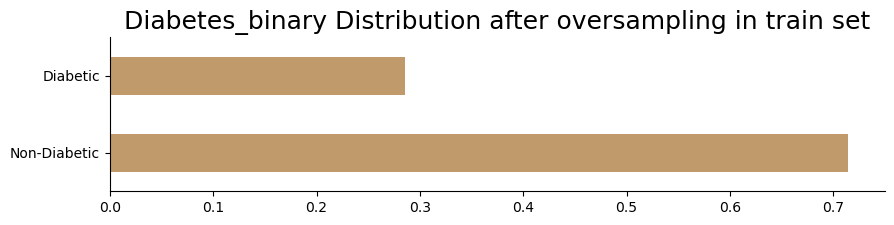


0    69981
1    69981
Name: Diabetes_binary, dtype: int64



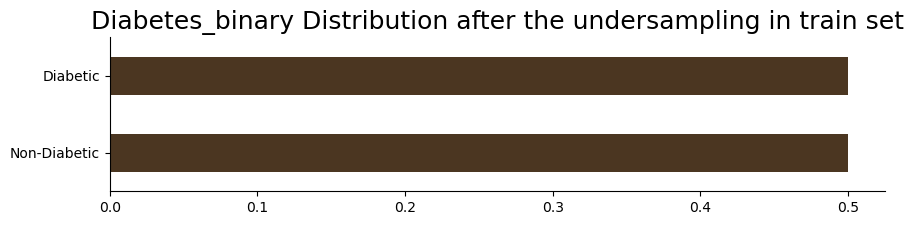


starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
SMOTE and RandomUnderSampler


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.985289,0.998947,0.121289,0.779632,0.772352,0.469433,0.905802,0.962291,0.306916
1,CatBoost,0.820173,0.911331,0.424061,0.795407,0.808432,0.452320,0.731642,0.837339,0.518033
2,XgBoost,0.807048,0.900986,0.439263,0.796148,0.811099,0.451500,0.720390,0.826915,0.528781
3,GaussianNB,0.724382,0.801178,0.524993,0.846392,0.658642,0.391929,0.491912,0.674996,0.712803
4,LogisticRegression,0.783941,0.879278,0.464821,0.790962,0.796760,0.457207,0.694933,0.808165,0.552329
5,GradientBoosting,0.798803,0.892009,0.448550,0.792269,0.811303,0.455775,0.715525,0.820825,0.533362


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.1, # dataset to allocate to test set
    random_state=689151, # setting the seed here
)

#oversampling
oversample = SMOTE(sampling_strategy=0.4, random_state=689151)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

#undersampling
rus = RandomUnderSampler(sampling_strategy=1, random_state=689151)
X_train, y_train = rus.fit_resample(X_train_smote, y_train_smote)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(y.value_counts(ascending=True))
print()
y.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes_binary Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

print(y_train_smote.value_counts(ascending=True))
print()
y_train_smote.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution after oversampling in train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()
print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#4B3621').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution after the undersampling in train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()

clf_N2 = ['RandomForest', 'CatBoost', 'XgBoost', 'GaussianNB', 'LogisticRegression', 'GradientBoosting']
clf_L2 = [clf_rdf, clf_catboost, clf_xgb, clf_gauss_nb, clf_lr, clf_gb]
print()

SMOTE_rus_Sampler_P = classifiers_models_test(clf_N2,clf_L2)
print('SMOTE and RandomUnderSampler')
SMOTE_rus_Sampler_P

Model is performing good but not better than oversampling using SMOTE

# Over-sampling using SMOTE and NearMiss

1     35097
0    194377
Name: Diabetes_binary, dtype: int64



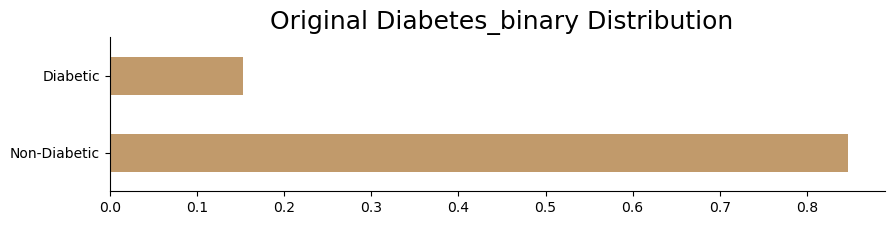


1     69981
0    174954
Name: Diabetes_binary, dtype: int64



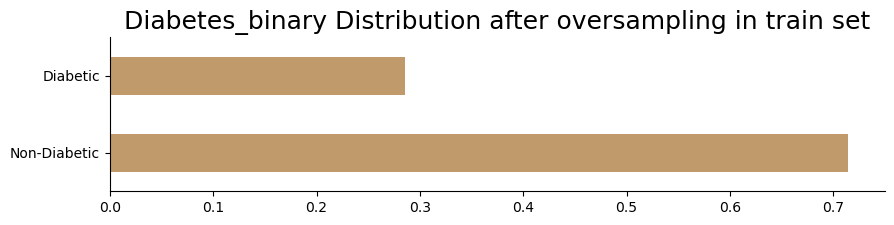


0    69981
1    69981
Name: Diabetes_binary, dtype: int64



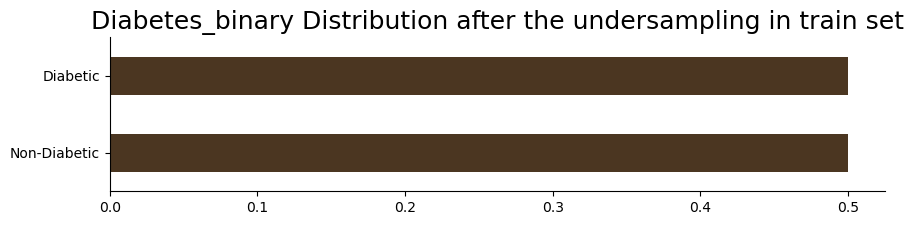


starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
starting
Appending
SMOTE and NearMiss


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.970421,0.997339,0.171987,0.540352,0.635769,0.677973,0.742372,0.769526,0.507570
1,CatBoost,0.880453,0.946119,0.345755,0.523401,0.621650,0.690362,0.606253,0.646514,0.627493
2,XgBoost,0.874302,0.939699,0.354540,0.538740,0.632264,0.679161,0.608584,0.652965,0.625632
3,GaussianNB,0.772760,0.881378,0.476697,0.793664,0.633140,0.454242,0.544029,0.648701,0.675256
4,LogisticRegression,0.841843,0.915175,0.397690,0.705377,0.742883,0.542792,0.673371,0.754143,0.571514
5,GradientBoosting,0.861898,0.929376,0.371620,0.572337,0.683041,0.653959,0.633028,0.698718,0.605782


In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.1, # dataset allocate to test set
    random_state=689151, # setting the seed
)

#oversampling
oversample = SMOTE(sampling_strategy=0.4, random_state=689151)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

#undersampling
nm = NearMiss(version = 1, n_neighbors = 10)
X_train, y_train = nm.fit_resample(X_train_smote, y_train_smote)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(y.value_counts(ascending=True))
print()
y.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes_binary Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

print(y_train_smote.value_counts(ascending=True))
print()
y_train_smote.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#C19A6B').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution after oversampling in train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()
print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh',figsize=(10, 2), color = '#4B3621').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution after the undersampling in train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()

print()
clf_N2 = ['RandomForest', 'CatBoost', 'XgBoost', 'GaussianNB', 'LogisticRegression', 'GradientBoosting']
clf_L2 = [clf_rdf, clf_catboost, clf_xgb, clf_gauss_nb, clf_lr, clf_gb]


SMOTE_nm_P = classifiers_models_test(clf_N2,clf_L2)
print('SMOTE and NearMiss')
SMOTE_nm_P

Model does not depict any improvemet. Oversampling using SMOTE is the good performer. 

# Model training results
RandomForest model with 0.930174 Accuracy using the SMOTE and BMI feature group had the highest performance in the unseen balanced dataset.

# Improving Feature selection

In [85]:
best_fl = c2_list.index.to_list()
best_fl.remove('BMI_bins')
best_fl

['PhysHlth',
 'BMI',
 'MentHlth',
 'Age',
 'HighBP',
 'DiffWalk',
 'GenHlth',
 'HeartDiseaseorAttack',
 'HighChol',
 'Income',
 'Stroke',
 'HvyAlcoholConsump',
 'PhysActivity',
 'Education',
 'Smoker',
 'Sex',
 'NoDocbcCost',
 'Veggies',
 'Fruits',
 'CholCheck',
 'AnyHealthcare']

In [86]:
unseen_data_clean = data_clean(unseen_data) 
scaler = StandardScaler()
clf_N2 = ['RandomForest']
clf_L2 = [clf_rdf]
oversample = SMOTE(sampling_strategy=1, random_state=689151)
P_df = pd.DataFrame(columns=['Model', 
                                'train_Accuracy','train_AUC', 'train_RMSE', 
                                'test_Accuracy','test_AUC', 'test_RMSE',
                                'unseen_Accuracy','unseen_AUC', 'unseen_RMSE'])

for num, col in enumerate(best_fl,start=1):
    #define columns to test
    cols_list = best_fl[:num]
    
    #D3 X and y
    X = D3[cols_list]
    y = D3['Diabetes_binary']
    scaler.fit(X)
    
    #unseen_data X and y
    unseen_data_X = unseen_data_clean[cols_list]
    unseen_data_y = unseen_data_clean['Diabetes_binary']
     
    #scaling in the unseen dataset features (X)
    unseen_data_X_scaled = scaler.transform(unseen_data_X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=689151) # we are setting the seed here

    #oversampling
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    # scaling X_train and X_test
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    print(f'{len(cols_list)} Columns used: {cols_list} ')
    smote_P = classifiers_models_test(clf_N2,clf_L2)
    smote_P['columns_names'] = [cols_list]
    smote_P['columns_size'] = len(cols_list)
    P_df = pd.concat([P_df, smote_P], ignore_index = True)
    
print('Finished.')



1 Columns used: ['PhysHlth'] 
starting
Appending
2 Columns used: ['PhysHlth', 'BMI'] 
starting
Appending
3 Columns used: ['PhysHlth', 'BMI', 'MentHlth'] 
starting
Appending
4 Columns used: ['PhysHlth', 'BMI', 'MentHlth', 'Age'] 
starting
Appending
5 Columns used: ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP'] 
starting
Appending
6 Columns used: ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk'] 
starting
Appending
7 Columns used: ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth'] 
starting
Appending
8 Columns used: ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack'] 
starting
Appending
9 Columns used: ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighChol'] 
starting
Appending
10 Columns used: ['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighChol', 'Income'] 
starting
Appending
11 Columns used: ['PhysHlth', '

In [87]:
P_df.reset_index(drop=True)

,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE,columns_names,columns_size
0,RandomForest,0.585502,0.600241,0.643815,0.709953,0.601626,0.538560,0.590541,0.610078,0.639890,[PhysHlth],1.0
1,RandomForest,0.647356,0.706602,0.593838,0.668642,0.689465,0.575637,0.651940,0.712288,0.589966,"[PhysHlth, BMI]",2.0
2,RandomForest,0.677061,0.753191,0.568277,0.655395,0.665708,0.587031,0.664668,0.729741,0.579078,"[PhysHlth, BMI, MentHlth]",3.0
3,RandomForest,0.763255,0.861433,0.486565,0.689908,0.684065,0.556859,0.729238,0.817448,0.520348,"[PhysHlth, BMI, MentHlth, Age]",4.0
4,RandomForest,0.797613,0.892467,0.449875,0.705421,0.698397,0.542751,0.759358,0.848928,0.490553,"[PhysHlth, BMI, MentHlth, Age, HighBP]",5.0
5,RandomForest,0.814057,0.909019,0.431211,0.717143,0.692823,0.531843,0.771305,0.862596,0.478221,"[PhysHlth, BMI, MentHlth, Age, HighBP, DiffWalk]",6.0
6,RandomForest,0.860712,0.947138,0.373213,0.746688,0.715943,0.503301,0.814081,0.905267,0.431183,"[PhysHlth, BMI, MentHlth, Age, HighBP, DiffWal...",7.0
7,RandomForest,0.873512,0.956226,0.355651,0.757059,0.714048,0.492890,0.822610,0.913445,0.421177,"[PhysHlth, BMI, MentHlth, Age, HighBP, DiffWal...",8.0
8,RandomForest,0.894952,0.968548,0.324110,0.768215,0.720816,0.481440,0.839871,0.927483,0.400161,"[PhysHlth, BMI, MentHlth, Age, HighBP, DiffWal...",9.0
9,RandomForest,0.944034,0.989924,0.236572,0.795668,0.730949,0.452030,0.883850,0.957243,0.340808,"[PhysHlth, BMI, MentHlth, Age, HighBP, DiffWal...",10.0


In this Dataset, using all the Features with SMOTE oversampling, the RandomForest model, we raise the performance of the model in the unseen dataset from 0.9301174 to 0.948246 Accuracy.

# Best Model Analysis

In [88]:
#D3 X and y
X = D3.drop(['Diabetes_binary', 'BMI_bins'], axis=1)
y = D3['Diabetes_binary']
scaler.fit(X)

#unseen_data X and y
unseen_data_y = unseen_data_clean['Diabetes_binary']
unseen_data_X = unseen_data_clean.drop(['Diabetes_binary', 'BMI_bins'], axis=1)

#scaling in the unseen dataset features (X)
unseen_data_X_scaled = scaler.transform(unseen_data_X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
X, # predictive variables
y, # target
test_size=0.1, # dataset to allocate to test set
random_state=689151) # setting the seed 

#oversampling
oversample = SMOTE(sampling_strategy=1, random_state=689151)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# scaling X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
i_clf = []

clf = RandomForestClassifier(random_state=689151)
clf.fit(X_train, y_train)

# predict X_train
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)[:,1]
acc_score_xtr = accuracy_score(y_train, y_pred)
auc_score_xtr = roc_auc_score(y_train,y_pred_proba)
rmse_xtr = np.sqrt(mean_squared_error(y_train, y_pred))

# predict X_test
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
acc_score_xts = accuracy_score(y_test, y_pred)
auc_score_xts = roc_auc_score(y_test,y_pred_proba)
rmse_xts = np.sqrt(mean_squared_error(y_test, y_pred))

# predict balanced unseen dataset unseen_data
y_pred = clf.predict(unseen_data_X_scaled)
y_pred_proba = clf.predict_proba(unseen_data_X_scaled)[:,1]
acc_score_un = accuracy_score(unseen_data_y, y_pred)
auc_score_un = roc_auc_score(unseen_data_y,y_pred_proba)

# RMSE score of the results in unseen dataset unseen_data
rmse_un = np.sqrt(mean_squared_error(unseen_data_y, y_pred))
i_clf.append(['RandomForest',acc_score_xtr,auc_score_xtr,rmse_xtr,acc_score_xts,auc_score_xts,rmse_xts,acc_score_un,auc_score_un,rmse_un])
i_df = pd.DataFrame(i_clf, columns=['Model', 
                        'train_Accuracy','train_AUC', 'train_RMSE', 
                        'test_Accuracy','test_AUC', 'test_RMSE',
                        'unseen_Accuracy','unseen_AUC', 'unseen_RMSE'])

In [90]:
i_df

,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.996228,0.99969,0.06142,0.840117,0.776614,0.399854,0.948333,0.986918,0.227305


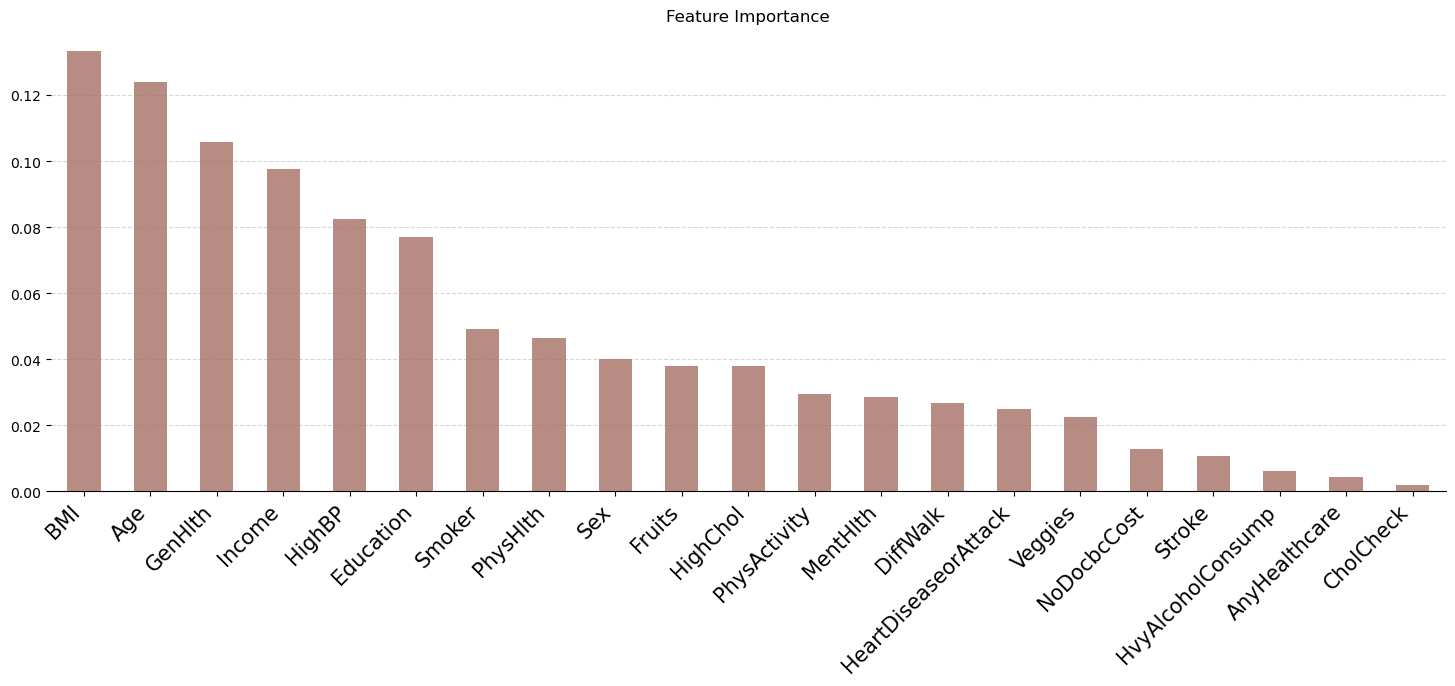

In [91]:
imp = pd.Series(clf.feature_importances_)
imp.index = X.columns.to_list()
(imp.sort_values(ascending=False)
 .plot.bar(figsize=(18,6),title="Feature Importance", alpha=0.8, zorder=3, color='#A57164')
 .spines[['top','right', 'left']].set_visible(False)
)
plt.grid(axis='y', linestyle='--', alpha=.5, zorder=1)
plt.xticks(rotation = 45, ha='right', size=15);

In [92]:
# confusion matrix plot function.

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

RandomForest:
              precision    recall  f1-score   support

non-diabetic       0.91      0.99      0.95     33960
    diabetic       0.99      0.91      0.95     35097

    accuracy                           0.95     69057
   macro avg       0.95      0.95      0.95     69057
weighted avg       0.95      0.95      0.95     69057



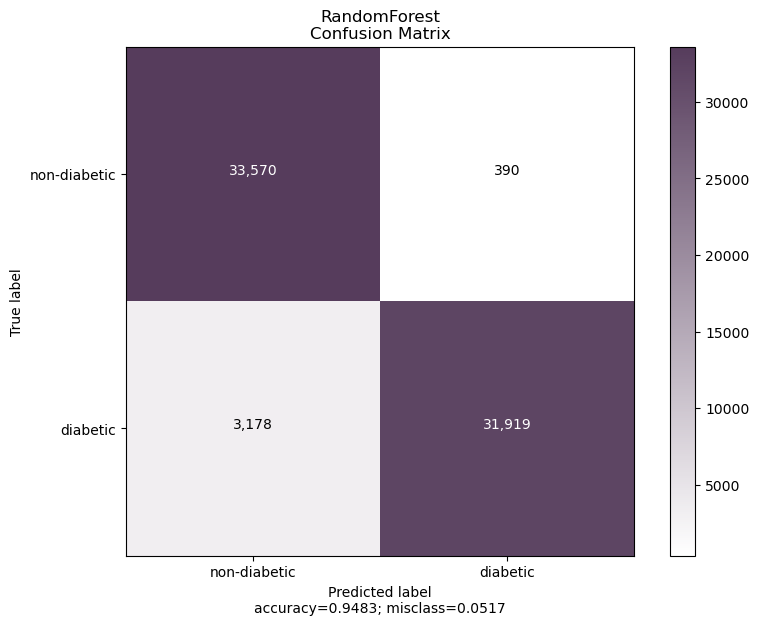

In [93]:
# setup for Confusion matrix

print('RandomForest:')
print(classification_report(unseen_data_y, y_pred, target_names=['non-diabetic','diabetic']))

target_names = ['non-diabetic','diabetic']
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['white', '#563C5C'])
cm = confusion_matrix(unseen_data_y, y_pred)
plot_confusion_matrix(cm, target_names, 'RandomForest\nConfusion Matrix', custom_cmap, normalize=False)

When it comes to fields like medicine (for example, diagnosing cancer), recall is very essential in order to reduce the possibility of overlooking positive instances as much as possible (predicting false negatives). In situations like these, the expense of incorrectly identifying anything as positive is generally much less than the expense of overlooking a positive instance entirely.

This algorithm has a recall score of 0.91, and there is room for improvement so that we can reduce the number of false negatives. The effectiveness of the model may suffer as a result of this, but a false positive will cause the patients significantly fewer problems than a false negative will.

RandomForest:
              precision    recall  f1-score   support

non-diabetic       0.92      0.99      0.95     33960
    diabetic       0.98      0.92      0.95     35097

    accuracy                           0.95     69057
   macro avg       0.95      0.95      0.95     69057
weighted avg       0.95      0.95      0.95     69057



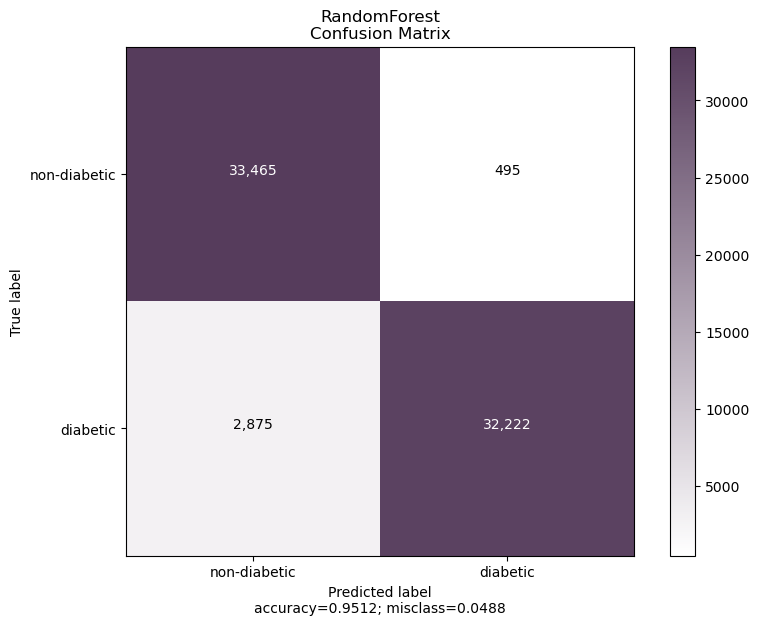

,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.996228,0.999041,0.06142,0.838766,0.774401,0.40154,0.9512,0.983477,0.220908


In [94]:
i_clf = []

clf = RandomForestClassifier(random_state=689151, class_weight= {0: 1, 1:20})
clf.fit(X_train, y_train)

# predict X_train
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)[:,1]
acc_score_xtr = accuracy_score(y_train, y_pred)
auc_score_xtr = roc_auc_score(y_train,y_pred_proba)
rmse_xtr = np.sqrt(mean_squared_error(y_train, y_pred))

# predict X_test
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
acc_score_xts = accuracy_score(y_test, y_pred)
auc_score_xts = roc_auc_score(y_test,y_pred_proba)
rmse_xts = np.sqrt(mean_squared_error(y_test, y_pred))

# predict balanced unseen dataset unseen_data
y_pred = clf.predict(unseen_data_X_scaled)
y_pred_proba = clf.predict_proba(unseen_data_X_scaled)[:,1]
acc_score_un = accuracy_score(unseen_data_y, y_pred)
auc_score_un = roc_auc_score(unseen_data_y,y_pred_proba)

# RMSE score of the results in unseen dataset unseen_data
rmse_un = np.sqrt(mean_squared_error(unseen_data_y, y_pred))
i_clf.append(['RandomForest',acc_score_xtr,auc_score_xtr,rmse_xtr,acc_score_xts,auc_score_xts,rmse_xts,acc_score_un,auc_score_un,rmse_un])
i_df = pd.DataFrame(i_clf, columns=['Model', 
                        'train_Accuracy','train_AUC', 'train_RMSE', 
                        'test_Accuracy','test_AUC', 'test_RMSE',
                        'unseen_Accuracy','unseen_AUC', 'unseen_RMSE'])

print('RandomForest:')
print(classification_report(unseen_data_y, y_pred, target_names=['non-diabetic','diabetic']))

target_names = ['non-diabetic','diabetic']
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['white', '#563C5C'])
cm = confusion_matrix(unseen_data_y, y_pred)
plot_confusion_matrix(cm, target_names, 'RandomForest\nConfusion Matrix', custom_cmap, normalize=False)

i_df

It was possible to achieve a 1% increase in the model's recall performance by modifying the model's class weights.

RandomForest:
              precision    recall  f1-score   support

non-diabetic       0.95      0.87      0.91     33960
    diabetic       0.88      0.95      0.92     35097

    accuracy                           0.91     69057
   macro avg       0.91      0.91      0.91     69057
weighted avg       0.91      0.91      0.91     69057



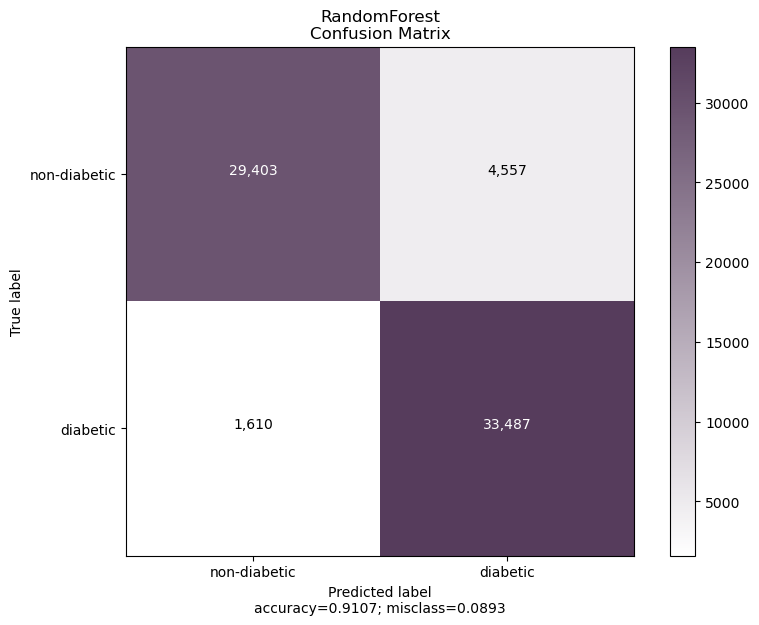

,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE,unseen_Accuracy,unseen_AUC,unseen_RMSE
0,RandomForest,0.937426,0.995869,0.250147,0.778412,0.787732,0.470731,0.910697,0.962097,0.298836


In [95]:
i_clf = []

clf = RandomForestClassifier(random_state=689151, class_weight= {0: 1, 1:12},min_impurity_decrease=1e-07)
clf.fit(X_train, y_train)

# predict X_train
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)[:,1]
acc_score_xtr = accuracy_score(y_train, y_pred)
auc_score_xtr = roc_auc_score(y_train,y_pred_proba)
rmse_xtr = np.sqrt(mean_squared_error(y_train, y_pred))

# predict X_test
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
acc_score_xts = accuracy_score(y_test, y_pred)
auc_score_xts = roc_auc_score(y_test,y_pred_proba)
rmse_xts = np.sqrt(mean_squared_error(y_test, y_pred))

# predict balanced unseen dataset unseen_data
y_pred = clf.predict(unseen_data_X_scaled)
y_pred_proba = clf.predict_proba(unseen_data_X_scaled)[:,1]
acc_score_un = accuracy_score(unseen_data_y, y_pred)
auc_score_un = roc_auc_score(unseen_data_y,y_pred_proba)

# RMSE score of the results in unseen dataset unseen_data
rmse_un = np.sqrt(mean_squared_error(unseen_data_y, y_pred))
i_clf.append(['RandomForest',acc_score_xtr,auc_score_xtr,rmse_xtr,acc_score_xts,auc_score_xts,rmse_xts,acc_score_un,auc_score_un,rmse_un])
i_df = pd.DataFrame(i_clf, columns=['Model', 
                        'train_Accuracy','train_AUC', 'train_RMSE', 
                        'test_Accuracy','test_AUC', 'test_RMSE',
                        'unseen_Accuracy','unseen_AUC', 'unseen_RMSE'])

print('RandomForest:')
print(classification_report(unseen_data_y, y_pred, target_names=['non-diabetic','diabetic']))

target_names = ['non-diabetic','diabetic']
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['white', '#563C5C'])
cm = confusion_matrix(unseen_data_y, y_pred)
plot_confusion_matrix(cm, target_names, 'RandomForest\nConfusion Matrix', custom_cmap, normalize=False)

i_df

The recall efficiency of the model was improved by 5% with a reduced trade-off in accuracy (4%), which was accomplished by modifying the class weights and the minimal reduction of the impurity of the model.

# Conclusion

HighBP, HighChol, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump, GenHlth, MentHlth, PhysHlth, DiffWalk, Age, Education, Income are the characteristics that correlate most strongly with the target.

Both males and females have the same risk for developing diabetes.

Those who are older than 45 years old have a greater risk of developing diabetes than those who are younger. The proportion of diabetics in the population rises in tandem with the average age of the population.

The number of individuals who have diabetes is decreasing as educational levels rise.

Diabetes is more likely to strike individuals with lesser incomes than those with higher incomes.

There are no anomalies when looking at age, education, or income.

Random Forest with SMOTE oversampling performs best for the unseen balanced dataset.

Our diabetic model has 0.91 accuracy and 0.95 recall after final tuning.